In [1]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import cartopy.feature as cfeature
import pyproj
import utm
import pandas as pd 
import traceback 
from pathlib import Path  
from mpl_toolkits.basemap import Basemap
import metpy.calc as mpcalc
from metpy.units import units
import os  
import numpy.ma as ma
import netCDF4 as nc
import glob
import datetime as dt
from netCDF4 import date2num,num2date

In [8]:
#Open HYCOM 25
#ds_25 = xr.open_mfdataset('/Users/Anna/Desktop/MSMET/Thesis/WRFprepData/March2018HYCOM/020_archv.2018_084_*_3z.nc', combine = 'by_coords', concat_dim = 'time')
ds_25 = xr.open_mfdataset('/Users/Anna/Desktop/MSMET/Thesis/WRFprepData/March2018HYCOM/020_archv.2018_084_*_3z.nc')#, combine = 'by_coords', concat_dim = 'time')

ds_25.to_netcdf('test_25.nc')
ds25 = xr.open_dataset('test_25.nc')

#DS1 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/WRFprepData/March2018HYCOM/020_archv.2018_084_14_3z.nc')

DS2 =  xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/WRFprepData/March2018HYCOM/020_archv.2018_084_15_3z.nc')


In [9]:
#test domain
#latbounds = [26.5, 27]
#lonbounds = [-91, -90.5]

#real domain 
latbounds = [24.5, 29]
lonbounds = [-93, -87.5]

lats = ds25.Latitude.values[:]
lons = ds25.Longitude.values[:]

#set upper & lower bounds
latli = np.argmin(np.abs(lats-latbounds[0]))
latui = np.argmin(np.abs(lats-latbounds[1]))
lonli = np.argmin(np.abs(lons-lonbounds[0]))
lonui = np.argmin(np.abs(lons-lonbounds[1]))

u_subset_25=ds25.variables['u'][:,0,latli:latui, lonli:lonui]

lat_array=ds25.Latitude.values[latli:latui]
lon_array=ds25.Longitude.values[lonli:lonui]

meanU_25 = u_subset_25.mean('MT')
#meanU_25=meanU_25*0.54 - 0.18
#meanU_25=meanU_25*0.49 - 0.22
meanU_25=meanU_25*0.54 - 0.19

#v current
v_subset_25=ds25.variables['v'][:,0,latli:latui, lonli:lonui]

lat_array=ds25.Latitude.values[latli:latui]
lon_array=ds25.Longitude.values[lonli:lonui]

meanV_25 = v_subset_25.mean('MT')
meanV_25=meanV_25*0.23 + 0.74


In [13]:
#REAL RUN 
latbounds = [24.5, 31]
lonbounds = [-93, -87.5]

#TEST RUN
#latbounds = [25, 26]
#lonbounds = [-89, -88]

lats = ds25.Latitude.values[:]
lons = ds25.Longitude.values[:]

#set upper & lower bounds
latli = np.argmin(np.abs(lats-latbounds[0]))
latui = np.argmin(np.abs(lats-latbounds[1]))
lonli = np.argmin(np.abs(lons-lonbounds[0]))
lonui = np.argmin(np.abs(lons-lonbounds[1]))

SST_subset_25=ds25.variables['water_temp'][:,0,latli:latui, lonli:lonui]
#SST_subset_26=ds26.variables['water_temp'][:,0,latli:latui, lonli:lonui]

u_subset_25=ds25.variables['u'][:,0,latli:latui, lonli:lonui]
v_subset_25=ds25.variables['v'][:,0,latli:latui, lonli:lonui]

#u_subset_26=ds26.variables['u'][:,0,latli:latui, lonli:lonui]
#v_subset_26=ds26.variables['v'][:,0,latli:latui, lonli:lonui]

lat_array=ds25.Latitude.values[latli:latui]
lon_array=ds25.Longitude.values[lonli:lonui]

#Calculate the mean
meanSST_25 = SST_subset_25.mean('MT')
#print('meanSST_25: ', meanSST_25.values)


meanU_25 = u_subset_25.mean('MT')
#print('meanU_25: ', meanU_25.values)
#print(np.min(meanU_25))
#print(np.max(meanU_25))

meanV_25 = v_subset_25.mean('MT')
#print('meanV_26: ', meanV_25.values)


print(meanU_25.shape)

print(meanV_25.shape)


print(meanSST_25.shape) #184, 112 

(184, 137)
(184, 137)
(184, 137)


C:\Users\Anna\anaconda3\envs\metpy\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


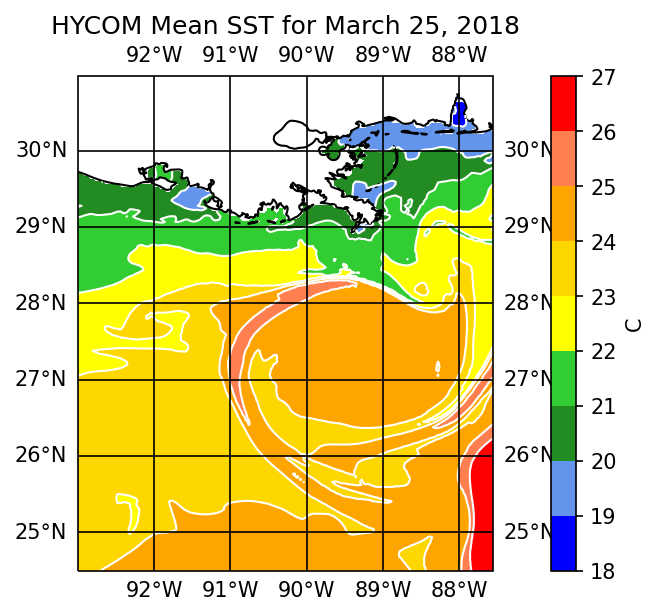

In [17]:
bounds = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
cmap = mpl.colors.ListedColormap(['blue', 'cornflowerblue', 'forestgreen', 'limegreen', 
                                  'yellow', 'gold', 'orange', 'coral', 'red'])
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#18 to 27
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(lon_array, lat_array, meanSST_25, levels = bounds, colors = ['blue', 'cornflowerblue',
                                                           'forestgreen', 'limegreen', 'yellow', 'gold', 'orange', 
                                                           'coral', 'red'])
ax.contour(lon_array, lat_array, meanSST_25, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = ' Degrees C')
plt.colorbar(cs, ax=ax, cmap=cmap, norm=norm, ticks = bounds, label = 'C')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM Mean SST for March 25, 2018')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + 'SST25.png',  bbox_inches = 'tight', dpi = 150)
plt.show()


In [4]:
#March 25 Dopplerscat
#ds25_1 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0036-0111_line01.L2.nc')
ds25_2 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0119-0174_line02.L2.nc')
ds25_3 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0189-0236_line03.L2.nc')
ds25_4 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0249-0312_line04.L2.nc')
ds25_5 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0326-0368_line05.L2.nc')
ds25_6 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0380-0436_line06.L2.nc')
ds25_7 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0450-0490_line07.L2.nc')
ds25_8 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0504-0552_line08.L2.nc')
ds25_9 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0565-0602_line09.L2.nc')
#ds25_10 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180325_084330_0609-0696_line10.L2.nc')

C:\Users\Anna\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


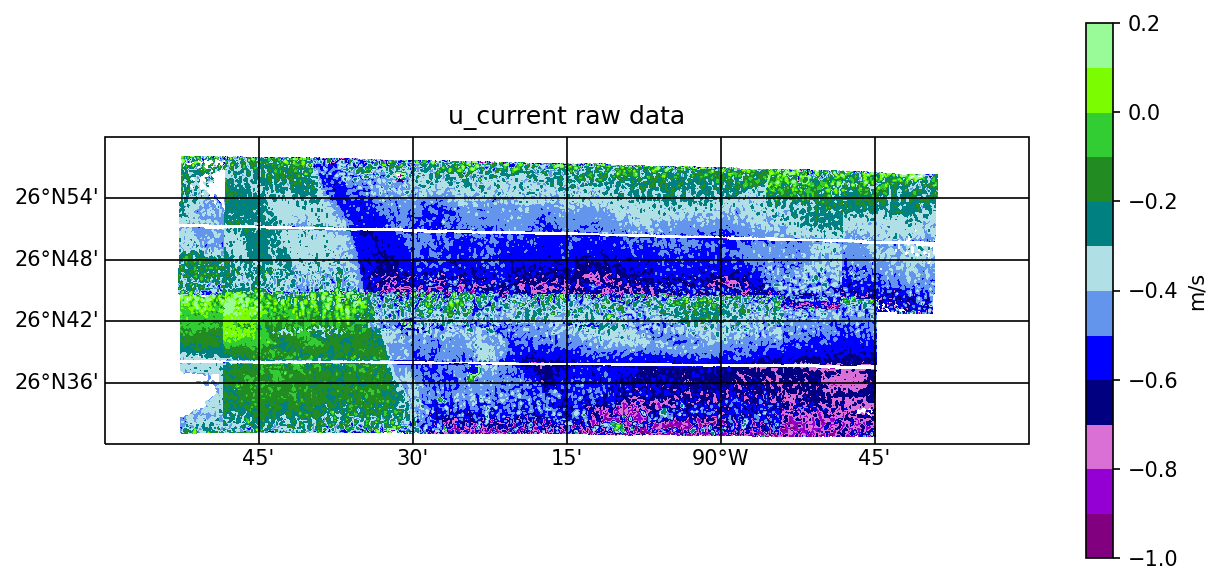

In [5]:
bounds = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2]

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-91, -89.5, 26.5, 27], crs=mapcrs)
ax.coastlines()


#cs = ax.contourf(ds25_1.longitude.values, ds25_1.latitude.values, ds25_1.u_current.values)
cs = ax.contourf(ds25_2.longitude.values, ds25_2.latitude.values, ds25_2.u_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 
                                                            'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 
                                                            'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_3.longitude.values, ds25_3.latitude.values, ds25_3.u_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 
                                                            'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 
                                                            'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_4.longitude.values, ds25_4.latitude.values, ds25_4.u_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 
                                                            'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 
                                                            'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_5.longitude.values, ds25_5.latitude.values, ds25_5.u_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 
                                                            'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 
                                                            'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_6.longitude.values, ds25_6.latitude.values, ds25_6.u_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 
                                                            'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 
                                                            'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_7.longitude.values, ds25_7.latitude.values, ds25_7.u_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 
                                                            'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 
                                                            'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_8.longitude.values, ds25_8.latitude.values, ds25_8.u_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 
                                                            'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 
                                                            'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
cs = ax.contourf(ds25_9.longitude.values, ds25_9.latitude.values, ds25_9.u_current.values, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 
                                                            'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 
                                                            'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
#cs = ax.contourf(ds25_10.longitude.values, ds25_10.latitude.values, ds25_10.u_current.values)
#cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, ds26_11.u_current.values)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('u_current raw data')
plt.show()

In [6]:
#set other DS variables 
#lat25_1=ds25_1.latitude.values
#lon25_1=ds25_1.longitude.values
#flag25_1=ds25_1.flag.values
#u_cur25_1=ds25_1.u_current.values

lat25_2=ds25_2.latitude.values
lon25_2=ds25_2.longitude.values
flag25_2=ds25_2.flag.values
u_cur25_2=ds25_2.u_current.values

lat25_3=ds25_3.latitude.values
lon25_3=ds25_3.longitude.values
flag25_3=ds25_3.flag.values
u_cur25_3=ds25_3.u_current.values

lat25_4=ds25_4.latitude.values
lon25_4=ds25_4.longitude.values
flag25_4=ds25_4.flag.values
u_cur25_4=ds25_4.u_current.values

lat25_5=ds25_5.latitude.values
lon25_5=ds25_5.longitude.values
flag25_5=ds25_5.flag.values
u_cur25_5=ds25_5.u_current.values

lat25_6=ds25_6.latitude.values
lon25_6=ds25_6.longitude.values
flag25_6=ds25_6.flag.values
u_cur25_6=ds25_6.u_current.values

lat25_7=ds25_7.latitude.values
lon25_7=ds25_7.longitude.values
flag25_7=ds25_7.flag.values
u_cur25_7=ds25_7.u_current.values

lat25_8=ds25_8.latitude.values
lon25_8=ds25_8.longitude.values
flag25_8=ds25_8.flag.values
u_cur25_8=ds25_8.u_current.values

lat25_9=ds25_9.latitude.values
lon25_9=ds25_9.longitude.values
flag25_9=ds25_9.flag.values
u_cur25_9=ds25_9.u_current.values

#lat25_10=ds25_10.latitude.values
#lon25_10=ds25_10.longitude.values
#flag25_10=ds25_10.flag.values
#u_cur25_10=ds25_10.u_current.values


#v current
#v_cur25_1=ds25_1.v_current.values
v_cur25_2=ds25_2.v_current.values
v_cur25_3=ds25_3.v_current.values
v_cur25_4=ds25_4.v_current.values
v_cur25_5=ds25_5.v_current.values
v_cur25_6=ds25_6.v_current.values
v_cur25_7=ds25_7.v_current.values
v_cur25_8=ds25_8.v_current.values
v_cur25_9=ds25_9.v_current.values
#v_cur25_10=ds25_10.v_current.values


In [7]:
#Apply Error Flag 
#0 is good, 2 is bad
#set flag to only accept 0
#lonlen25_1=len(lon25_1) #236
#latlen25_1=len(lat25_1) #954
#goodUarr25_1=np.zeros((latlen25_1,lonlen25_1))
#goodUarr25_1[:]=np.nan
#goodVarr25_1=np.zeros((latlen25_1,lonlen25_1))
#goodVarr25_1[:]=np.nan
#for x in range (len(lon25_1)):
#    for y in range (len(lat25_1)):
#        if flag25_1[y,x] == 0:
#            goodUarr25_1[y,x] = u_cur25_1[y,x] 
#            goodVarr25_1[y,x] = v_cur25_1[y,x] 
           
lonlen25_2=len(lon25_2)
latlen25_2=len(lat25_2)
goodUarr25_2=np.zeros((latlen25_2,lonlen25_2))
goodUarr25_2[:]=np.nan
goodVarr25_2=np.zeros((latlen25_2,lonlen25_2))
goodVarr25_2[:]=np.nan
for x in range (len(lon25_2)):
    for y in range (len(lat25_2)):
        if flag25_2[y,x] == 0:
            goodUarr25_2[y,x] = u_cur25_2[y,x] 
            goodVarr25_2[y,x] = v_cur25_2[y,x] 
            
lonlen25_3=len(lon25_3)
latlen25_3=len(lat25_3)
goodUarr25_3=np.zeros((latlen25_3,lonlen25_3))
goodUarr25_3[:]=np.nan
goodVarr25_3=np.zeros((latlen25_3,lonlen25_3))
goodVarr25_3[:]=np.nan
for x in range (len(lon25_3)):
    for y in range (len(lat25_3)):
        if flag25_3[y,x] == 0:
            goodUarr25_3[y,x] = u_cur25_3[y,x] 
            goodVarr25_3[y,x] = v_cur25_3[y,x] 
            
lonlen25_4=len(lon25_4)
latlen25_4=len(lat25_4)
goodUarr25_4=np.zeros((latlen25_4,lonlen25_4))
goodUarr25_4[:]=np.nan
goodVarr25_4=np.zeros((latlen25_4,lonlen25_4))
goodVarr25_4[:]=np.nan
for x in range (len(lon25_4)):
    for y in range (len(lat25_4)):
        if flag25_4[y,x] == 0:
            goodUarr25_4[y,x] = u_cur25_4[y,x] 
            goodVarr25_4[y,x] = v_cur25_4[y,x] 
            
lonlen25_5=len(lon25_5)
latlen25_5=len(lat25_5)
goodUarr25_5=np.zeros((latlen25_5,lonlen25_5))
goodUarr25_5[:]=np.nan
goodVarr25_5=np.zeros((latlen25_5,lonlen25_5))
goodVarr25_5[:]=np.nan
for x in range (len(lon25_5)):
    for y in range (len(lat25_5)):
        if flag25_5[y,x] == 0:
            goodUarr25_5[y,x] = u_cur25_5[y,x] 
            goodVarr25_5[y,x] = v_cur25_5[y,x] 
            
lonlen25_6=len(lon25_6)
latlen25_6=len(lat25_6)
goodUarr25_6=np.zeros((latlen25_6,lonlen25_6))
goodUarr25_6[:]=np.nan
goodVarr25_6=np.zeros((latlen25_6,lonlen25_6))
goodVarr25_6[:]=np.nan
for x in range (len(lon25_6)):
    for y in range (len(lat25_6)):
        if flag25_6[y,x] == 0:
            goodUarr25_6[y,x] = u_cur25_6[y,x] 
            goodVarr25_6[y,x] = v_cur25_6[y,x] 
            
lonlen25_7=len(lon25_7)
latlen25_7=len(lat25_7)
goodUarr25_7=np.zeros((latlen25_7,lonlen25_7))
goodUarr25_7[:]=np.nan
goodVarr25_7=np.zeros((latlen25_7,lonlen25_7))
goodVarr25_7[:]=np.nan
for x in range (len(lon25_7)):
    for y in range (len(lat25_7)):
        if flag25_7[y,x] == 0:
            goodUarr25_7[y,x] = u_cur25_7[y,x] 
            goodVarr25_7[y,x] = v_cur25_7[y,x] 
            
lonlen25_8=len(lon25_8)
latlen25_8=len(lat25_8)
goodUarr25_8=np.zeros((latlen25_8, lonlen25_8))
goodUarr25_8[:]=np.nan
goodVarr25_8=np.zeros((latlen25_8,lonlen25_8))
goodVarr25_8[:]=np.nan
for x in range (len(lon25_8)):
    for y in range (len(lat25_8)):
        if flag25_8[y,x] == 0:
            goodUarr25_8[y,x] = u_cur25_8[y,x] 
            goodVarr25_8[y,x] = v_cur25_8[y,x] 
            
lonlen25_9=len(lon25_9)
latlen25_9=len(lat25_9)
goodUarr25_9=np.zeros((latlen25_9, lonlen25_9))
goodUarr25_9[:]=np.nan
goodVarr25_9=np.zeros((latlen25_9,lonlen25_9))
goodVarr25_9[:]=np.nan
for x in range (len(lon25_9)):
    for y in range (len(lat25_9)):
        if flag25_9[y,x] == 0:
            goodUarr25_9[y,x] = u_cur25_9[y,x] 
            goodVarr25_9[y,x] = v_cur25_9[y,x] 

#lonlen25_10=len(lon25_10)
#latlen25_10=len(lat25_10)
#goodUarr25_10=np.zeros((latlen25_10, lonlen25_10))
#goodUarr25_10[:]=np.nan
#goodVarr25_10=np.zeros((latlen25_10,lonlen25_10))
#goodVarr25_10[:]=np.nan
#for x in range (len(lon25_10)):
#    for y in range (len(lat25_10)):
#        if flag25_10[y,x] == 0:
#            goodUarr25_10[y,x] = u_cur25_10[y,x] 
#            goodVarr25_10[y,x] = v_cur25_10[y,x] 


In [8]:
#Gaussian Filter U25
HYCOM_lat = lat_array
HYCOM_lon = lon_array

#Define new grid: 1km (1000m)
#match WRF refernce lat/lon, increment by partial degree 
###### !!!!! wrf lat lon NEED TO UPDATE THESE !!!!! ######

#REAL CASE: 
#lat_0 =  24.5
#lon_0 = -93
#lat_max = 28.75
#lon_max = -87.5

#TEST CASE: DS Domain
lat_0 =  26.45
lon_0 = -90.9
lat_max = 27.15
lon_max = -89.65 

#TEST CASE mini
#lat_0 =  26.75
#lon_0 = -90
#lat_max = 27
#lon_max = -89.75 

#min, max, then increment and fill lat & then lon (Y=lat, X=lon)
WRF_lat = np.arange(lat_0, lat_max, 0.00898315)
WRF_lon = np.arange(lon_0, lon_max, 0.00898315)
WRF_latLen = len(WRF_lat)
WRF_lonLen = len(WRF_lon)

#make current arrays (u & v) that match lat & lon dimensions, fill with nans 
u25_WRF  = np.zeros((WRF_latLen, WRF_lonLen))   
u25_WRF[:] = -999
DS_weightedU25 = u25_WRF*0
HYCOM_weightedU25 = u25_WRF*0

#at equator, 1deg = 111.31949077920639km, so 1km*(1deg/111.31949077920639km) = 0.00898315
#Great Circle Calculator 
#http://edwilliams.org/gccalc.htm

km_per_deg= 1/0.00898315
sigma_HYCOM = 0.02 # 0.015*2 #For HYCOM 
sigma_HYCOM_km = sigma_HYCOM*km_per_deg
sigma_DS = 1.0 #0.5-1.0 
#sigma_DS = 0.85
sigma_DS_km = sigma_DS*km_per_deg

for y in range (0, WRF_latLen):  
    #print(' y :', y)
    for x in range (0, WRF_lonLen):
        #print('x:', x)
        sum_weight_HYCOM = 0
        sum_product_u25HYCOM = 0
        #sum_weight_DS25u1 = 0
        #sum_product_u25DS1 = 0
        sum_weight_DS25u2 = 0
        sum_product_u25DS2 = 0
        sum_weight_DS25u3 = 0
        sum_product_u25DS3 = 0
        sum_weight_DS25u4 = 0
        sum_product_u25DS4 = 0
        sum_weight_DS25u5 = 0
        sum_product_u25DS5 = 0
        sum_weight_DS25u6 = 0
        sum_product_u25DS6 = 0
        sum_weight_DS25u7 = 0
        sum_product_u25DS7 = 0
        sum_weight_DS25u8 = 0
        sum_product_u25DS8 = 0
        sum_weight_DS25u9 = 0
        sum_product_u25DS9 = 0
        #sum_weight_DS25u10 = 0
        #sum_product_u25DS10 = 0
       
        #define area of weighting (lat,lon point +- 3 sigma in lat/lon but round up)
        #+- half size 
        #set bounds in lat/lon
        min_lon = max(WRF_lon[x] - 3*sigma_HYCOM, WRF_lon[0])
        max_lon = min(WRF_lon[x] + 3*sigma_HYCOM, WRF_lon[WRF_lonLen -1])
        min_lat = max(WRF_lat[y] - 3*sigma_HYCOM, WRF_lat[0])   
        max_lat = min(WRF_lat[y] + 3*sigma_HYCOM, WRF_lat[WRF_latLen -1])       

        good_lon = [] 
        good_lat = []
        inter_like = []
        
        #HYCOM lat/lon comparison 
        test1_In = np.where(HYCOM_lon >= min_lon)
        test2_In = np.where(HYCOM_lon <= max_lon)
        inter_like_lon = np.intersect1d(test1_In, test2_In)
        
        test1_In = np.where(HYCOM_lat >= min_lat)
        test2_In = np.where(HYCOM_lat <= max_lat)
        inter_like_lat = np.intersect1d(test1_In, test2_In)   
        
        #DS lat/lon comparison
        #DS25u1_test1_In = np.where(lon25_1 >= min_lon)
        #DS25u1_test2_In = np.where(lon25_1 <= max_lon)
        #DS25u1_inter_like_lon = np.intersect1d(DS25u1_test1_In, DS25u1_test2_In)
        #DS25u1_test1_In = np.where(lat25_1 >= min_lat)
        #DS25u1_test2_In = np.where(lat25_1 <= max_lat)
        #DS25u1_inter_like_lat = np.intersect1d(DS25u1_test1_In, DS25u1_test2_In)         
        
        DS25u2_test1_In = np.where(lon25_2 >= min_lon)
        DS25u2_test2_In = np.where(lon25_2 <= max_lon)
        DS25u2_inter_like_lon = np.intersect1d(DS25u2_test1_In, DS25u2_test2_In)
        DS25u2_test1_In = np.where(lat25_2 >= min_lat)
        DS25u2_test2_In = np.where(lat25_2 <= max_lat)
        DS25u2_inter_like_lat = np.intersect1d(DS25u2_test1_In, DS25u2_test2_In) 
        
        DS25u3_test1_In = np.where(lon25_3 >= min_lon)
        DS25u3_test2_In = np.where(lon25_3 <= max_lon)
        DS25u3_inter_like_lon = np.intersect1d(DS25u3_test1_In, DS25u3_test2_In)
        DS25u3_test1_In = np.where(lat25_3 >= min_lat)
        DS25u3_test2_In = np.where(lat25_3 <= max_lat)
        DS25u3_inter_like_lat = np.intersect1d(DS25u3_test1_In, DS25u3_test2_In) 
        
        DS25u4_test1_In = np.where(lon25_4 >= min_lon)
        DS25u4_test2_In = np.where(lon25_4 <= max_lon)
        DS25u4_inter_like_lon = np.intersect1d(DS25u4_test1_In, DS25u4_test2_In)
        DS25u4_test1_In = np.where(lat25_4 >= min_lat)
        DS25u4_test2_In = np.where(lat25_4 <= max_lat)
        DS25u4_inter_like_lat = np.intersect1d(DS25u4_test1_In, DS25u4_test2_In)         
        
        DS25u5_test1_In = np.where(lon25_5 >= min_lon)
        DS25u5_test2_In = np.where(lon25_5 <= max_lon)
        DS25u5_inter_like_lon = np.intersect1d(DS25u5_test1_In, DS25u5_test2_In)
        DS25u5_test1_In = np.where(lat25_5 >= min_lat)
        DS25u5_test2_In = np.where(lat25_5 <= max_lat)
        DS25u5_inter_like_lat = np.intersect1d(DS25u5_test1_In, DS25u5_test2_In) 
        
        DS25u6_test1_In = np.where(lon25_6 >= min_lon)
        DS25u6_test2_In = np.where(lon25_6 <= max_lon)
        DS25u6_inter_like_lon = np.intersect1d(DS25u6_test1_In, DS25u6_test2_In)
        DS25u6_test1_In = np.where(lat25_6 >= min_lat)
        DS25u6_test2_In = np.where(lat25_6 <= max_lat)
        DS25u6_inter_like_lat = np.intersect1d(DS25u6_test1_In, DS25u6_test2_In) 

        DS25u7_test1_In = np.where(lon25_7 >= min_lon)
        DS25u7_test2_In = np.where(lon25_7 <= max_lon)
        DS25u7_inter_like_lon = np.intersect1d(DS25u7_test1_In, DS25u7_test2_In)
        DS25u7_test1_In = np.where(lat25_7 >= min_lat)
        DS25u7_test2_In = np.where(lat25_7 <= max_lat)
        DS25u7_inter_like_lat = np.intersect1d(DS25u7_test1_In, DS25u7_test2_In)
    
        DS25u8_test1_In = np.where(lon25_8 >= min_lon)
        DS25u8_test2_In = np.where(lon25_8 <= max_lon)
        DS25u8_inter_like_lon = np.intersect1d(DS25u8_test1_In, DS25u8_test2_In)
        DS25u8_test1_In = np.where(lat25_8 >= min_lat)
        DS25u8_test2_In = np.where(lat25_8 <= max_lat)
        DS25u8_inter_like_lat = np.intersect1d(DS25u8_test1_In, DS25u8_test2_In) 
        
        DS25u9_test1_In = np.where(lon25_9 >= min_lon)
        DS25u9_test2_In = np.where(lon25_9 <= max_lon)
        DS25u9_inter_like_lon = np.intersect1d(DS25u9_test1_In, DS25u9_test2_In)
        DS25u9_test1_In = np.where(lat25_9 >= min_lat)
        DS25u9_test2_In = np.where(lat25_9 <= max_lat)
        DS25u9_inter_like_lat = np.intersect1d(DS25u9_test1_In, DS25u9_test2_In) 
        
        #DS25u10_test1_In = np.where(lon25_10 >= min_lon)
        #DS25u10_test2_In = np.where(lon25_10 <= max_lon)
        #DS25u10_inter_like_lon = np.intersect1d(DS25u10_test1_In, DS25u10_test2_In)
        #DS25u10_test1_In = np.where(lat25_10 >= min_lat)
        #DS25u10_test2_In = np.where(lat25_10 <= max_lat)
        #DS25u10_inter_like_lat = np.intersect1d(DS25u10_test1_In, DS25u10_test2_In) 
        
        #HYCOM index
        lon_indices = inter_like_lon
        lat_indices = inter_like_lat
        
        #DS index
        #DS25u1_lon_indices =  DS25u1_inter_like_lon
        #DS25u1_lat_indices =  DS25u1_inter_like_lat
        DS25u2_lon_indices =  DS25u2_inter_like_lon
        DS25u2_lat_indices =  DS25u2_inter_like_lat
        DS25u3_lon_indices =  DS25u3_inter_like_lon
        DS25u3_lat_indices =  DS25u3_inter_like_lat
        DS25u4_lon_indices =  DS25u4_inter_like_lon
        DS25u4_lat_indices =  DS25u4_inter_like_lat        
        DS25u5_lon_indices =  DS25u5_inter_like_lon
        DS25u5_lat_indices =  DS25u5_inter_like_lat
        DS25u6_lon_indices =  DS25u6_inter_like_lon
        DS25u6_lat_indices =  DS25u6_inter_like_lat
        DS25u7_lon_indices =  DS25u7_inter_like_lon
        DS25u7_lat_indices =  DS25u7_inter_like_lat
        DS25u8_lon_indices =  DS25u8_inter_like_lon
        DS25u8_lat_indices =  DS25u8_inter_like_lat
        DS25u9_lon_indices =  DS25u9_inter_like_lon
        DS25u9_lat_indices =  DS25u9_inter_like_lat 
        #DS25u10_lon_indices =  DS25u10_inter_like_lon
        #DS25u10_lat_indices =  DS25u10_inter_like_lat  
        
        #Good HYCOM index
        good_lon = HYCOM_lon[lon_indices]
        good_lat = HYCOM_lat[lat_indices]    
        
        #Good DS index
        #DS25u1_good_lon = lon25_1[DS25u1_lon_indices]
        #DS25u1_good_lat = lat25_1[DS25u1_lat_indices] 
        DS25u2_good_lon = lon25_2[DS25u2_lon_indices]
        DS25u2_good_lat = lat25_2[DS25u2_lat_indices] 
        DS25u3_good_lon = lon25_3[DS25u3_lon_indices]
        DS25u3_good_lat = lat25_3[DS25u3_lat_indices] 
        DS25u4_good_lon = lon25_4[DS25u4_lon_indices]
        DS25u4_good_lat = lat25_4[DS25u4_lat_indices] 
        DS25u5_good_lon = lon25_5[DS25u5_lon_indices]
        DS25u5_good_lat = lat25_5[DS25u5_lat_indices] 
        DS25u6_good_lon = lon25_6[DS25u6_lon_indices]
        DS25u6_good_lat = lat25_6[DS25u6_lat_indices] 
        DS25u7_good_lon = lon25_7[DS25u7_lon_indices]
        DS25u7_good_lat = lat25_7[DS25u7_lat_indices] 
        DS25u8_good_lon = lon25_8[DS25u8_lon_indices]
        DS25u8_good_lat = lat25_8[DS25u8_lat_indices]
        DS25u9_good_lon = lon25_9[DS25u9_lon_indices]
        DS25u9_good_lat = lat25_9[DS25u9_lat_indices] 
        #DS25u10_good_lon = lon25_10[DS25u10_lon_indices]
        #DS25u10_good_lat = lat25_10[DS25u10_lat_indices]
    
        #get lengths of good arrays HYCOM 
        good_lon_len = len(good_lon)
        good_lat_len = len(good_lat)
        
        #DS length of food arrays 
        #DS25u1_good_lon_len = len(DS25u1_good_lon)
        #DS25u1_good_lat_len = len(DS25u1_good_lat) 
        DS25u2_good_lon_len = len(DS25u2_good_lon)
        DS25u2_good_lat_len = len(DS25u2_good_lat) 
        DS25u3_good_lon_len = len(DS25u3_good_lon)
        DS25u3_good_lat_len = len(DS25u3_good_lat) 
        DS25u4_good_lon_len = len(DS25u4_good_lon)
        DS25u4_good_lat_len = len(DS25u4_good_lat) 
        DS25u5_good_lon_len = len(DS25u5_good_lon)
        DS25u5_good_lat_len = len(DS25u5_good_lat) 
        DS25u6_good_lon_len = len(DS25u6_good_lon)
        DS25u6_good_lat_len = len(DS25u6_good_lat)  
        DS25u7_good_lon_len = len(DS25u7_good_lon)
        DS25u7_good_lat_len = len(DS25u7_good_lat) 
        DS25u8_good_lon_len = len(DS25u8_good_lon)
        DS25u8_good_lat_len = len(DS25u8_good_lat) 
        DS25u9_good_lon_len = len(DS25u9_good_lon)
        DS25u9_good_lat_len = len(DS25u9_good_lat) 
        #DS25u10_good_lon_len = len(DS25u10_good_lon)
        #DS25u10_good_lat_len = len(DS25u10_good_lat)      
        
        #loop through values of good HYCOM arrays 
        for y_small in range(0, good_lat_len):
            for x_small in range(0, good_lon_len):         
                
                #calcualte the distance, 1km  
                #HYCOM distance 
                distance=(km_per_deg)*np.sqrt((good_lat[y_small]-WRF_lat[y])**2+((good_lon[x_small]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                
                #determine weights- get an array of poitns of the smaller domain
                if distance <= 3 * sigma_HYCOM_km: 
                    weight_HYCOM = 0.2*(1 / (sigma_HYCOM_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_HYCOM_km**2))
                else: 
                    weight_HYCOM = 0 
                    
                #sum wieghts for HYCOM u & v
                sum_weight_HYCOM = sum_weight_HYCOM + weight_HYCOM
                
                #if sum of weights != 0, sum product of weights* current value for HYCOM                         
                sum_product_u25HYCOM = sum_product_u25HYCOM + weight_HYCOM * meanU_25[lat_indices[y_small], lon_indices[x_small]]
                HYCOM_weightedU25[y,x] =  (sum_product_u25HYCOM/sum_weight_HYCOM)
                
        #loop through values of good DS arrays 
        #for y_small_DS25u1 in range(0, DS25u1_good_lat_len):
        #    for x_small_DS25u1 in range(0, DS25u1_good_lon_len):         
        #        distance=(km_per_deg)*np.sqrt((DS25u1_good_lat[y_small_DS25u1]-WRF_lat[y])**2+((DS25u1_good_lon[x_small_DS25u1]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
        #        if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_1[DS25u1_lat_indices[y_small_DS25u1], DS25u1_lon_indices[x_small_DS25u1]]): 
        #            weight_DS25u1 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
        #            sum_weight_DS25u1 = sum_weight_DS25u1 + weight_DS25u1
        #            sum_product_u25DS1 = sum_product_u25DS1 + weight_DS25u1 * goodUarr25_1[DS25u1_lat_indices[y_small_DS25u1], DS25u1_lon_indices[x_small_DS25u1]]
        #        else: 
        #            weight_DS25u1 = 0
        
        for y_small_DS25u2 in range(0, DS25u2_good_lat_len):
            for x_small_DS25u2 in range(0, DS25u2_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25u2_good_lat[y_small_DS25u2]-WRF_lat[y])**2+((DS25u2_good_lon[x_small_DS25u2]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_2[DS25u2_lat_indices[y_small_DS25u2], DS25u2_lon_indices[x_small_DS25u2]]): 
                    weight_DS25u2 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25u2 = sum_weight_DS25u2 + weight_DS25u2
                    sum_product_u25DS2 = sum_product_u25DS2 + weight_DS25u2 * goodUarr25_2[DS25u2_lat_indices[y_small_DS25u2], DS25u2_lon_indices[x_small_DS25u2]]
                else: 
                    weight_DS25u2 = 0
        
        for y_small_DS25u3 in range(0, DS25u3_good_lat_len):
            for x_small_DS25u3 in range(0, DS25u3_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25u3_good_lat[y_small_DS25u3]-WRF_lat[y])**2+((DS25u3_good_lon[x_small_DS25u3]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_3[DS25u3_lat_indices[y_small_DS25u3], DS25u3_lon_indices[x_small_DS25u3]]): 
                    weight_DS25u3 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25u3 = sum_weight_DS25u3 + weight_DS25u3
                    sum_product_u25DS3 = sum_product_u25DS3 + weight_DS25u3 * goodUarr25_3[DS25u3_lat_indices[y_small_DS25u3], DS25u3_lon_indices[x_small_DS25u3]]
                else: 
                    weight_DS25u3 = 0 
                    
        for y_small_DS25u4 in range(0, DS25u4_good_lat_len):
            for x_small_DS25u4 in range(0, DS25u4_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25u4_good_lat[y_small_DS25u4]-WRF_lat[y])**2+((DS25u4_good_lon[x_small_DS25u4]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_4[DS25u4_lat_indices[y_small_DS25u4], DS25u4_lon_indices[x_small_DS25u4]]): 
                    weight_DS25u4 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25u4 = sum_weight_DS25u4 + weight_DS25u4
                    sum_product_u25DS4 = sum_product_u25DS4 + weight_DS25u4 * goodUarr25_4[DS25u4_lat_indices[y_small_DS25u4], DS25u4_lon_indices[x_small_DS25u4]]
                else: 
                    weight_DS25u4 = 0 
                    
        for y_small_DS25u5 in range(0, DS25u5_good_lat_len):
            for x_small_DS25u5 in range(0, DS25u5_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25u5_good_lat[y_small_DS25u5]-WRF_lat[y])**2+((DS25u5_good_lon[x_small_DS25u5]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_5[DS25u5_lat_indices[y_small_DS25u5], DS25u5_lon_indices[x_small_DS25u5]]): 
                    weight_DS25u5 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25u5 = sum_weight_DS25u5 + weight_DS25u5
                    sum_product_u25DS5 = sum_product_u25DS5 + weight_DS25u5 * goodUarr25_5[DS25u5_lat_indices[y_small_DS25u5], DS25u5_lon_indices[x_small_DS25u5]]
                else: 
                    weight_DS25u5 = 0 
                    
        for y_small_DS25u6 in range(0, DS25u6_good_lat_len):
            for x_small_DS25u6 in range(0, DS25u6_good_lon_len):          
                distance=(km_per_deg)*np.sqrt((DS25u6_good_lat[y_small_DS25u6]-WRF_lat[y])**2+((DS25u6_good_lon[x_small_DS25u6]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_6[DS25u6_lat_indices[y_small_DS25u6], DS25u6_lon_indices[x_small_DS25u6]]): 
                    weight_DS25u6 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25u6 = sum_weight_DS25u6 + weight_DS25u6
                    sum_product_u25DS6 = sum_product_u25DS6 + weight_DS25u6 * goodUarr25_6[DS25u6_lat_indices[y_small_DS25u6], DS25u6_lon_indices[x_small_DS25u6]]
                else: 
                    weight_DS25u6 = 0 
                    
        for y_small_DS25u7 in range(0, DS25u7_good_lat_len):
            for x_small_DS25u7 in range(0, DS25u7_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25u7_good_lat[y_small_DS25u7]-WRF_lat[y])**2+((DS25u7_good_lon[x_small_DS25u7]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_7[DS25u7_lat_indices[y_small_DS25u7], DS25u7_lon_indices[x_small_DS25u7]]): 
                    weight_DS25u7 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25u7 = sum_weight_DS25u7 + weight_DS25u7
                    sum_product_u25DS7 = sum_product_u25DS7 + weight_DS25u7 * goodUarr25_7[DS25u7_lat_indices[y_small_DS25u7], DS25u7_lon_indices[x_small_DS25u7]]
                else: 
                    weight_DS25u7 = 0 
                    
        for y_small_DS25u8 in range(0, DS25u8_good_lat_len):
            for x_small_DS25u8 in range(0, DS25u8_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25u8_good_lat[y_small_DS25u8]-WRF_lat[y])**2+((DS25u8_good_lon[x_small_DS25u8]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_8[DS25u8_lat_indices[y_small_DS25u8], DS25u8_lon_indices[x_small_DS25u8]]): 
                    weight_DS25u8 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25u8 = sum_weight_DS25u8 + weight_DS25u8
                    sum_product_u25DS8 = sum_product_u25DS8 + weight_DS25u8 * goodUarr25_8[DS25u8_lat_indices[y_small_DS25u8], DS25u8_lon_indices[x_small_DS25u8]]
                else: 
                    weight_DS25u8 = 0 
                    
        for y_small_DS25u9 in range(0, DS25u9_good_lat_len):
            for x_small_DS25u9 in range(0, DS25u9_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25u9_good_lat[y_small_DS25u9]-WRF_lat[y])**2+((DS25u9_good_lon[x_small_DS25u9]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_9[DS25u9_lat_indices[y_small_DS25u9], DS25u9_lon_indices[x_small_DS25u9]]): 
                    weight_DS25u9 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25u9 = sum_weight_DS25u9 + weight_DS25u9
                    sum_product_u25DS9 = sum_product_u25DS9 + weight_DS25u9 * goodUarr25_9[DS25u9_lat_indices[y_small_DS25u9], DS25u9_lon_indices[x_small_DS25u9]]
                else: 
                    weight_DS25u9 = 0 
                    
   #     for y_small_DS25u10 in range(0, DS25u10_good_lat_len):
   #         for x_small_DS25u10 in range(0, DS25u10_good_lon_len):         
   #             distance=(km_per_deg)*np.sqrt((DS25u10_good_lat[y_small_DS25u10]-WRF_lat[y])**2+((DS25u10_good_lon[x_small_DS25u10]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
    #            if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr25_10[DS25u10_lat_indices[y_small_DS25u10], DS25u10_lon_indices[x_small_DS25u10]]): 
    #               weight_DS25u10 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
    #               sum_weight_DS25u10 = sum_weight_DS25u10 + weight_DS25u10
    #               sum_product_u25DS10 = sum_product_u25DS10 + weight_DS25u10 * goodUarr25_10[DS25u10_lat_indices[y_small_DS25u10], DS25u10_lon_indices[x_small_DS25u10]]
    #           else: 
    #               weight_DS25u10 = 0 
                    
    #outside of loop: sum of products/sum of weights
        DS_weight = (sum_weight_DS25u2 + sum_weight_DS25u2 + sum_weight_DS25u3 + sum_weight_DS25u4 + sum_weight_DS25u5 + sum_weight_DS25u6 + sum_weight_DS25u7 + sum_weight_DS25u8 + sum_weight_DS25u9 ) #add each DS sum, add ech sum weigth     
        if DS_weight != 0: 
            DS_weightedU25[y,x] =  (sum_product_u25DS2 + sum_product_u25DS3 + sum_product_u25DS4 + sum_product_u25DS5 + sum_product_u25DS6 + sum_product_u25DS7 + sum_product_u25DS8 + sum_product_u25DS9 )/( sum_weight_DS25u2 + sum_weight_DS25u2 + sum_weight_DS25u3 + sum_weight_DS25u4 + sum_weight_DS25u5 + sum_weight_DS25u6 + sum_weight_DS25u7 + sum_weight_DS25u8 + sum_weight_DS25u9) #add each DS sum, add ech sum weigth 
        else: 
            DS_weightedU25[y,x] = -999
            
        u25_WRF[y,x] = (sum_product_u25HYCOM+  sum_product_u25DS2 + sum_product_u25DS3 + sum_product_u25DS4 + sum_product_u25DS5 + sum_product_u25DS6 + sum_product_u25DS7 + sum_product_u25DS8 + sum_product_u25DS9 )/(sum_weight_HYCOM+ sum_weight_DS25u2 + sum_weight_DS25u2 + sum_weight_DS25u3 + sum_weight_DS25u4 + sum_weight_DS25u5 + sum_weight_DS25u6 + sum_weight_DS25u7 + sum_weight_DS25u8 + sum_weight_DS25u9 ) #add each DS sum, add ech sum weigth 


In [9]:
print(u25_WRF.shape)
print(WRF_lon.shape)
print(WRF_lat.shape)
print(u25_WRF)
print(DS_weightedU25.shape)
print(HYCOM_weightedU25.shape)

for x in u25_WRF: 
    for y in x: 
        if np.isnan(y):
            print('NaN present')
            
for x in u25_WRF: 
    for y in x: 
        if y == -999:
            print('-999 present')

(78, 140)
(140,)
(78,)
[[-0.38375831 -0.38459764 -0.38535493 ... -0.67323821 -0.67410362
  -0.67410362]
 [-0.38375831 -0.38459794 -0.38535531 ... -0.67323791 -0.67366427
  -0.67410362]
 [-0.19187098 -0.18535413 -0.18305094 ... -0.67200961 -0.67236666
  -0.67273327]
 ...
 [-0.18365221 -0.18323931 -0.18287404 ... -0.19898171 -0.19885094
  -0.19916533]
 [-0.18268128 -0.18223877 -0.18190563 ... -0.19544285 -0.1956627
  -0.1958917 ]
 [-0.18216247 -0.18173488 -0.1813541  ... -0.19380478 -0.19396979
  -0.19414245]]
(78, 140)
(78, 140)


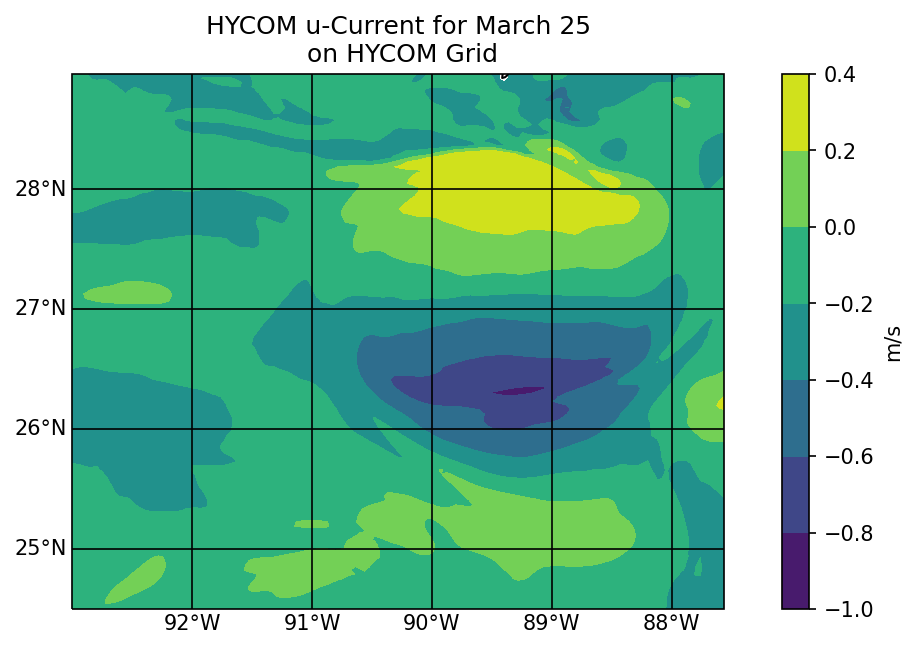

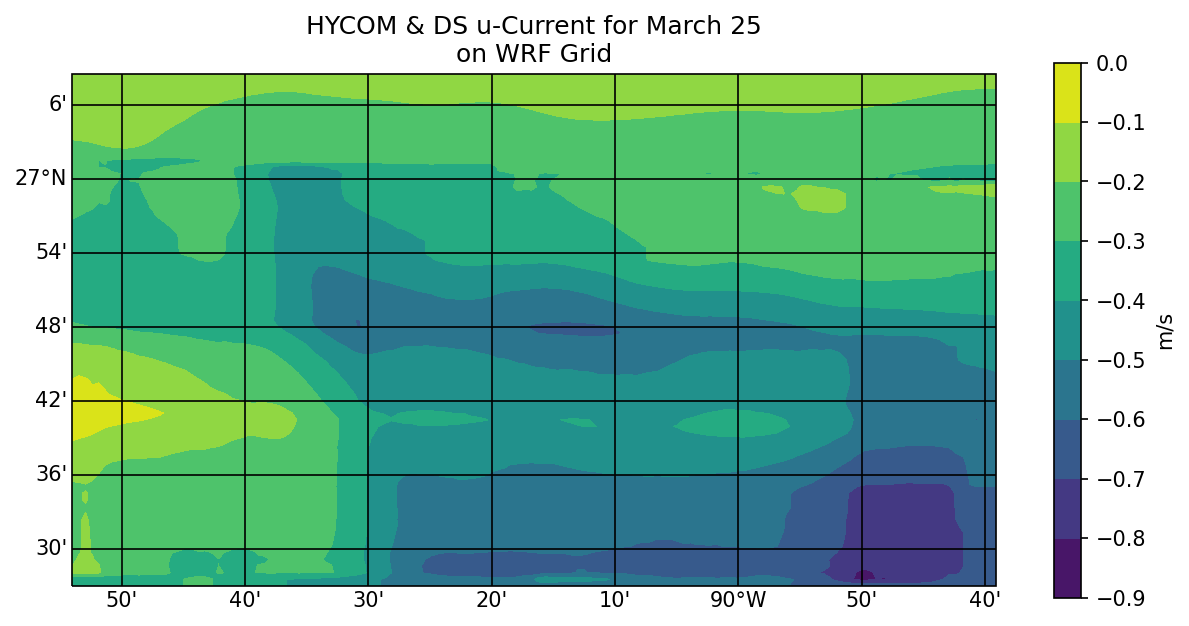

In [10]:
#U25
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(lon_array, lat_array, meanU_25)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM u-Current for March 25\n on HYCOM Grid')
plt.show()
#U25 smooth
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, u25_WRF)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM & DS u-Current for March 25\non WRF Grid')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + '1sigma.png', bbox_inches = 'tight',dpi = 150)
plt.show()

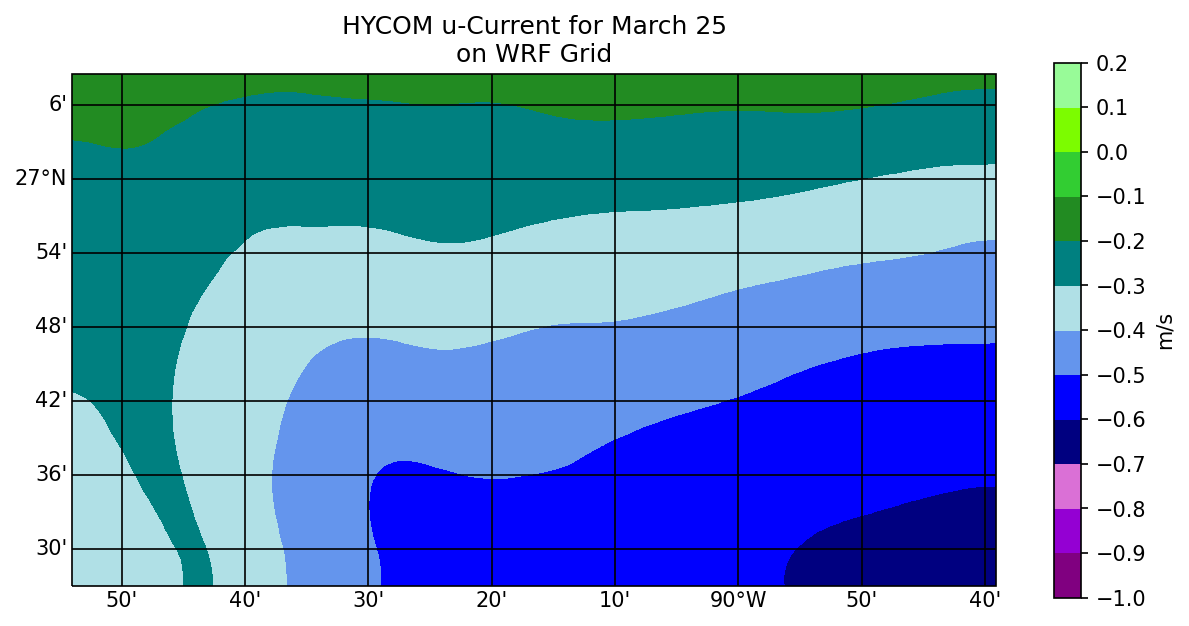

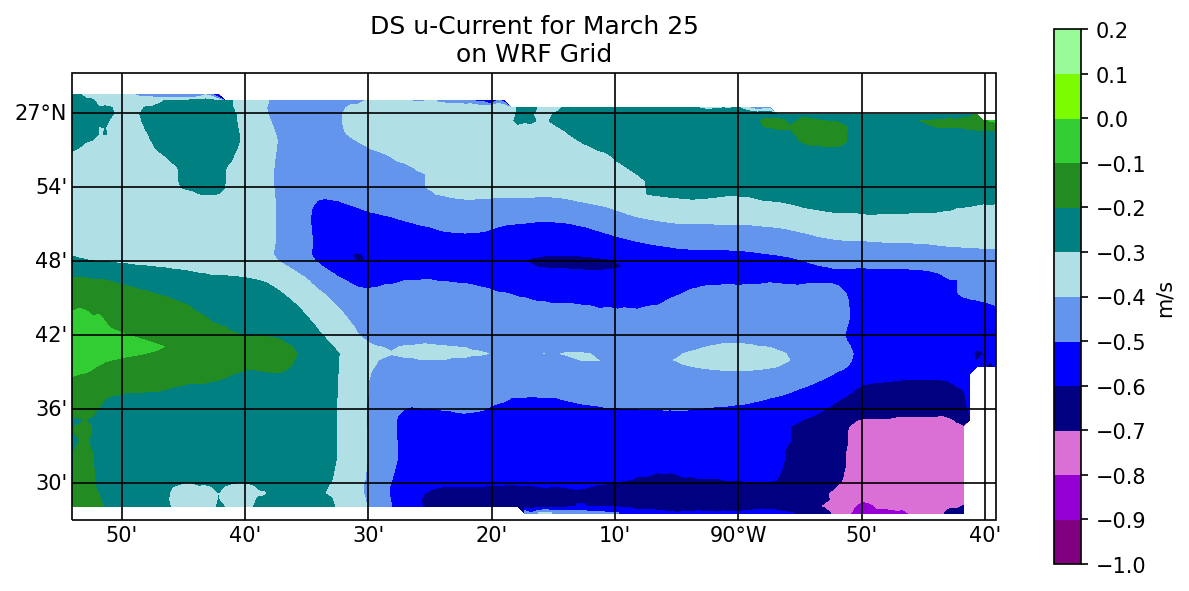

In [11]:
#bounds = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
bounds = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2]

#U25 smooth HYCOM
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, HYCOM_weightedU25, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 
                                                            'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 
                                                            'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, ticks = bounds, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM u-Current for March 25\non WRF Grid')
#save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
#plt.savefig(save_results_to + '25U_Weighted.png', bbox_inches = 'tight',dpi = 150)
plt.show()



#U25 smooth DS
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, DS_weightedU25, levels = bounds, colors = ['purple', 'darkviolet', 'orchid', 'navy', 
                                                            'blue', 'cornflowerblue', 'powderblue', 'teal',
                                                           'forestgreen', 'limegreen', 'lawngreen', 'palegreen', 
                                                            'yellow', 'gold', 'khaki', 'orange', 
                                                           'peru', 'lightcoral', 'coral', 'red', 'maroon' ])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, ticks = bounds, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('DS u-Current for March 25\non WRF Grid')
#save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
#plt.savefig(save_results_to + '25U_Weighted.png', bbox_inches = 'tight',dpi = 150)
plt.show()

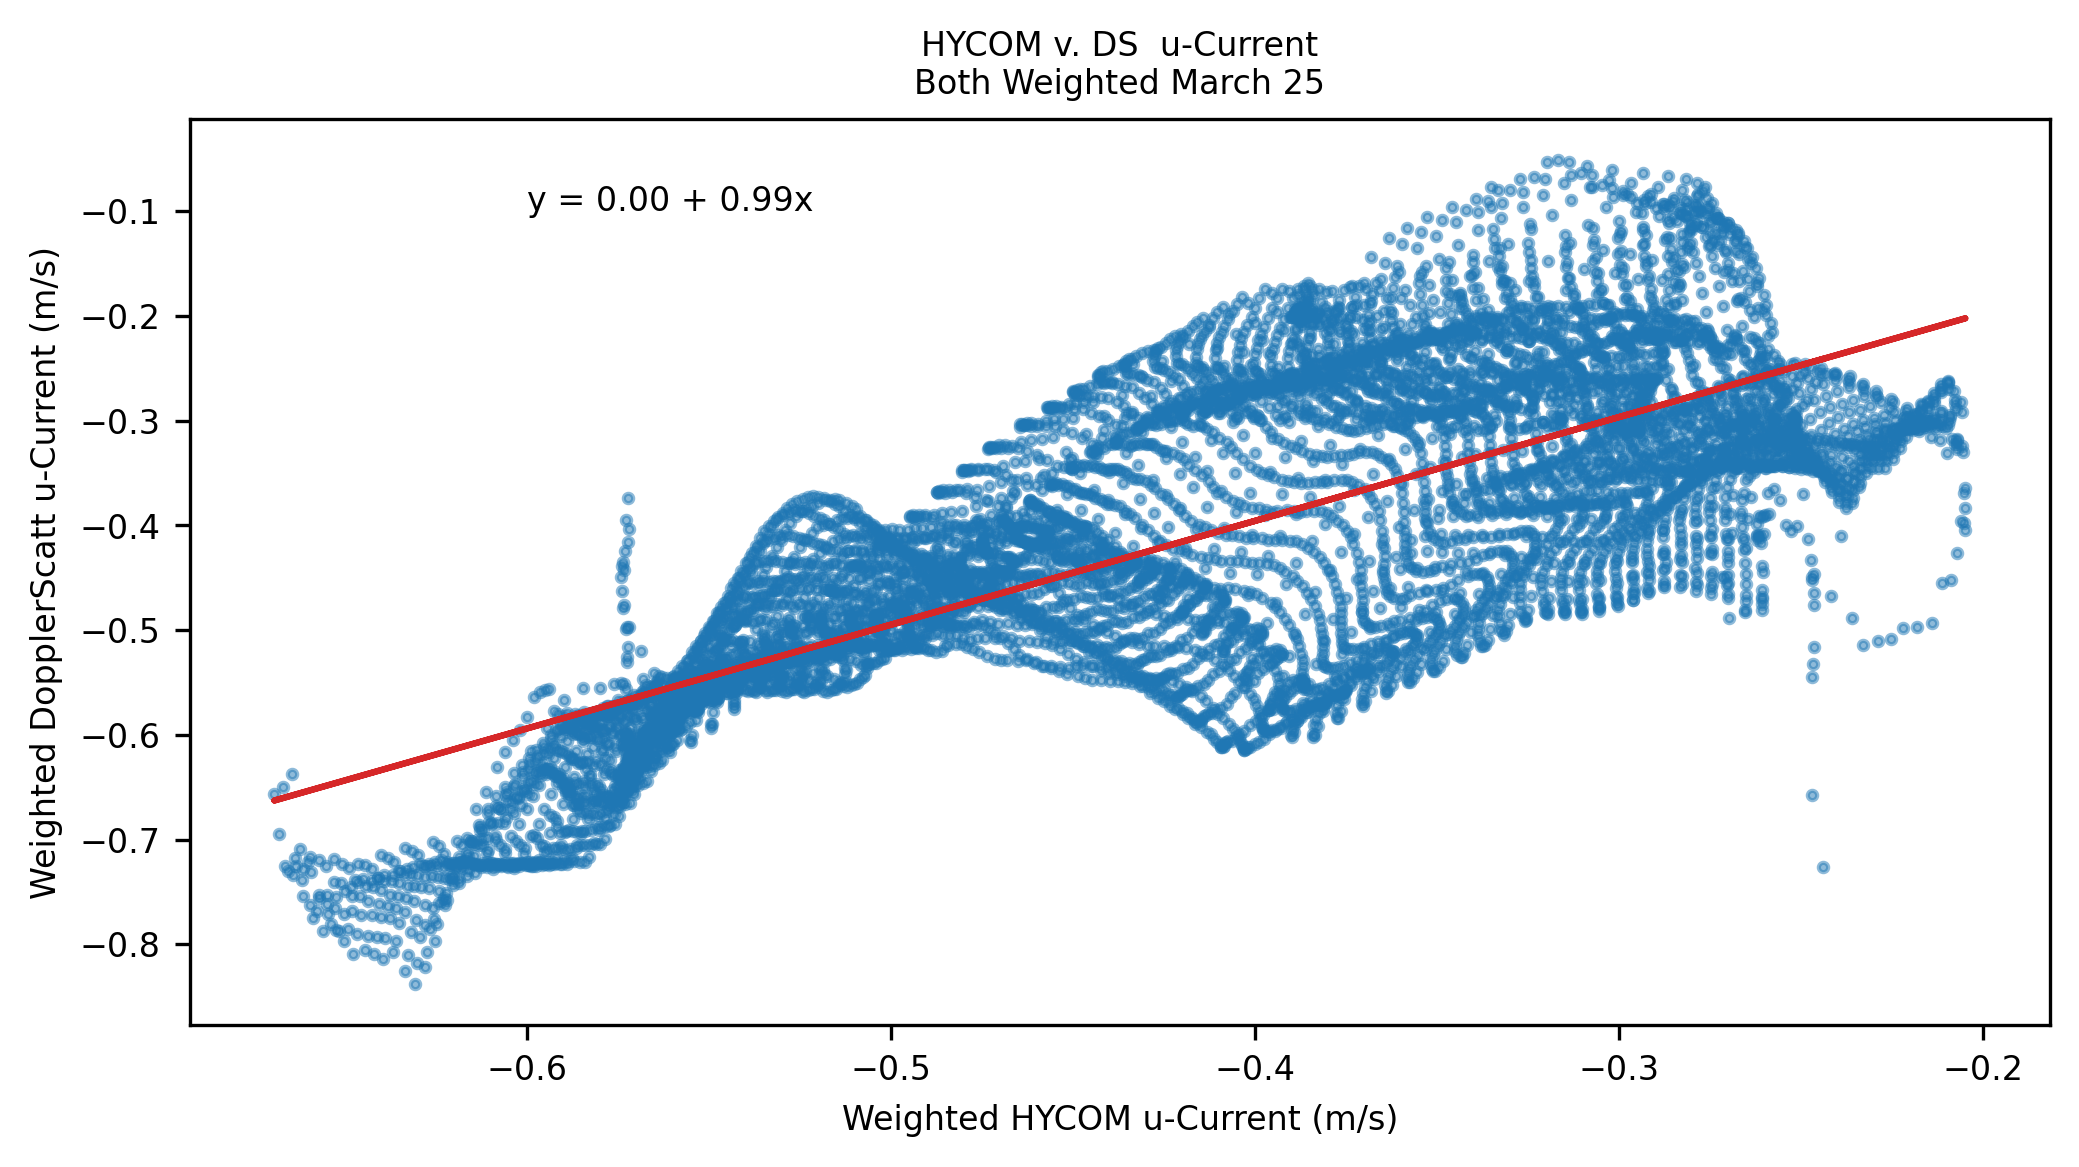

In [12]:
#Scatter for U HYCOM and U DS 

DS25U = DS_weightedU25.flatten() #y, noisier variable on y 
HYCOM25U = HYCOM_weightedU25.flatten() #x 

test_1 = np.where(DS25U > -900)
test_2 = DS25U[test_1]
test_3 = HYCOM25U[test_1]

DS25U = test_2
HYCOM25U = test_3

a, b= np.polyfit(HYCOM25U, DS25U, 1)

SMALL_SIZE = 8
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
figure(figsize=(8,4), dpi=300)
#alpha between 0 and 1, 0=transparent, 1=solid
plt.scatter(HYCOM25U, DS25U, color='tab:blue', alpha=0.50, s=5)

plt.plot(HYCOM25U, a*HYCOM25U+b, color = 'tab:red')
plt.text(-0.6, -0.1, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=8)

plt.title('HYCOM v. DS  u-Current\nBoth Weighted March 25')
plt.ylabel('Weighted DopplerScatt u-Current (m/s)')
plt.xlabel('Weighted HYCOM u-Current (m/s)')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + '25U_Scatter.png', bbox_inches = 'tight',dpi = 150)
plt.show()


In [13]:
#Gaussian Filter V25
#HYCOM: lat_array (Y), lon_array (X), meanU_25
#DS: goodUarr25_1-10, lat25_1, lon25_1s

HYCOM_lat = lat_array
HYCOM_lon = lon_array

#Define new grid: 1km (1000m)
#match WRF refernce lat/lon, increment by partial degree 
###### !!!!! wrf lat lon NEED TO UPDATE THESE !!!!! ######
#REAL CASE: 
#lat_0 =  24.5
#lon_0 = -93
#lat_max = 28.75
#lon_max = -87.5

#TEST CASE: DS Domain
lat_0 =  26.45
lon_0 = -90.9
lat_max = 27.15
lon_max = -89.65 

#TEST CASE mini
#lat_0 =  26.75
#lon_0 = -90
#lat_max = 27
#lon_max = -89.75 


#min, max, then increment and fill lat & then lon (Y=lat, X=lon)
#0.008 degrees = 1km 
WRF_lat = np.arange(lat_0, lat_max, 0.00898315)
WRF_lon = np.arange(lon_0, lon_max, 0.00898315)
WRF_latLen = len(WRF_lat)
WRF_lonLen = len(WRF_lon)

#make current arrays (u & v) that match lat & lon dimensions, fill with nans 
#u25_WRF  = np.zeros((WRF_latLen, WRF_lonLen))   #(813, 688)
v25_WRF = np.zeros((WRF_latLen, WRF_lonLen))  
#u25_WRF[:] = -999
v25_WRF[:] = -999
#u26_WRF  = np.zeros((WRF_latLen, WRF_lonLen))   #(813, 688)
#v26_WRF = np.zeros((WRF_latLen, WRF_lonLen))  
#u26_WRF[:] = -999
#v26_WRF[:] = -999
#sst25_WRF  = np.zeros((WRF_latLen, WRF_lonLen))   #(813, 688)
#sst26_WRF = np.zeros((WRF_latLen, WRF_lonLen))  
#sst25_WRF[:] = -999
#sst26_WRF[:] = -999
DS_weightedV25 = v25_WRF*0
HYCOM_weightedV25= v25_WRF*0

#at equator, 1deg = 111.31949077920639km, so 1km*(1deg/111.31949077920639km) = 0.00898315
#Great Circle Calculator 
#http://edwilliams.org/gccalc.htm

#DS sigma??? = 0.03 # 0.015*2   
km_per_deg= 1/0.00898315
sigma_HYCOM = 0.02 # 0.015*2 #For HYCOM 
sigma_HYCOM_km = sigma_HYCOM*km_per_deg
sigma_DS = 1.0 #0.5-1.0 
sigma_DS_km = sigma_DS*km_per_deg


for y in range (0, WRF_latLen):  
    #print(' y :', y)
    for x in range (0, WRF_lonLen):
        #print('x:', x)
        sum_weight_HYCOM = 0
        sum_product_v25HYCOM = 0
        #sum_weight_DS25v1 = 0
        #sum_product_v25DS1 = 0
        sum_weight_DS25v2 = 0
        sum_product_v25DS2 = 0
        sum_weight_DS25v3 = 0
        sum_product_v25DS3 = 0
        sum_weight_DS25v4 = 0
        sum_product_v25DS4 = 0
        sum_weight_DS25v5 = 0
        sum_product_v25DS5 = 0
        sum_weight_DS25v6 = 0
        sum_product_v25DS6 = 0
        sum_weight_DS25v7 = 0
        sum_product_v25DS7 = 0
        sum_weight_DS25v8 = 0
        sum_product_v25DS8 = 0
        sum_weight_DS25v9 = 0
        sum_product_v25DS9 = 0
        #sum_weight_DS25v10 = 0
        #sum_product_v25DS10 = 0

        #define area of weighting (lat,lon point +- 3 sigma in lat/lon but round up)
        #+- half size 
        #set bounds in lat/lon
        min_lon = max(WRF_lon[x] - 3*sigma_HYCOM, WRF_lon[0])
        max_lon = min(WRF_lon[x] + 3*sigma_HYCOM, WRF_lon[WRF_lonLen -1])
        min_lat = max(WRF_lat[y] - 3*sigma_HYCOM, WRF_lat[0])   
        max_lat = min(WRF_lat[y] + 3*sigma_HYCOM, WRF_lat[WRF_latLen -1])   
        
        good_lon = [] 
        good_lat = []
        inter_like = []
        
        #HYCOM lat/lon comparison 
        test1_In = np.where(HYCOM_lon >= min_lon)
        test2_In = np.where(HYCOM_lon <= max_lon)
        inter_like_lon = np.intersect1d(test1_In, test2_In)
        
        test1_In = np.where(HYCOM_lat >= min_lat)
        test2_In = np.where(HYCOM_lat <= max_lat)
        inter_like_lat = np.intersect1d(test1_In, test2_In)   
        
        #DS lat/lon comparison
        #DS25v1_test1_In = np.where(lon25_1 >= min_lon)
        #DS25v1_test2_In = np.where(lon25_1 <= max_lon)
        #DS25v1_inter_like_lon = np.intersect1d(DS25v1_test1_In, DS25v1_test2_In)
        #DS25v1_test1_In = np.where(lat25_1 >= min_lat)
        #DS25v1_test2_In = np.where(lat25_1 <= max_lat)
        #DS25v1_inter_like_lat = np.intersect1d(DS25v1_test1_In, DS25v1_test2_In)         
        
        DS25v2_test1_In = np.where(lon25_2 >= min_lon)
        DS25v2_test2_In = np.where(lon25_2 <= max_lon)
        DS25v2_inter_like_lon = np.intersect1d(DS25v2_test1_In, DS25v2_test2_In)
        DS25v2_test1_In = np.where(lat25_2 >= min_lat)
        DS25v2_test2_In = np.where(lat25_2 <= max_lat)
        DS25v2_inter_like_lat = np.intersect1d(DS25v2_test1_In, DS25v2_test2_In) 
        
        DS25v3_test1_In = np.where(lon25_3 >= min_lon)
        DS25v3_test2_In = np.where(lon25_3 <= max_lon)
        DS25v3_inter_like_lon = np.intersect1d(DS25v3_test1_In, DS25v3_test2_In)
        DS25v3_test1_In = np.where(lat25_3 >= min_lat)
        DS25v3_test2_In = np.where(lat25_3 <= max_lat)
        DS25v3_inter_like_lat = np.intersect1d(DS25v3_test1_In, DS25v3_test2_In) 
        
        DS25v4_test1_In = np.where(lon25_4 >= min_lon)
        DS25v4_test2_In = np.where(lon25_4 <= max_lon)
        DS25v4_inter_like_lon = np.intersect1d(DS25v4_test1_In, DS25v4_test2_In)
        DS25v4_test1_In = np.where(lat25_4 >= min_lat)
        DS25v4_test2_In = np.where(lat25_4 <= max_lat)
        DS25v4_inter_like_lat = np.intersect1d(DS25v4_test1_In, DS25v4_test2_In)         
        
        DS25v5_test1_In = np.where(lon25_5 >= min_lon)
        DS25v5_test2_In = np.where(lon25_5 <= max_lon)
        DS25v5_inter_like_lon = np.intersect1d(DS25v5_test1_In, DS25v5_test2_In)
        DS25v5_test1_In = np.where(lat25_5 >= min_lat)
        DS25v5_test2_In = np.where(lat25_5 <= max_lat)
        DS25v5_inter_like_lat = np.intersect1d(DS25v5_test1_In, DS25v5_test2_In) 
        
        DS25v6_test1_In = np.where(lon25_6 >= min_lon)
        DS25v6_test2_In = np.where(lon25_6 <= max_lon)
        DS25v6_inter_like_lon = np.intersect1d(DS25v6_test1_In, DS25v6_test2_In)
        DS25v6_test1_In = np.where(lat25_6 >= min_lat)
        DS25v6_test2_In = np.where(lat25_6 <= max_lat)
        DS25v6_inter_like_lat = np.intersect1d(DS25v6_test1_In, DS25v6_test2_In) 

        DS25v7_test1_In = np.where(lon25_7 >= min_lon)
        DS25v7_test2_In = np.where(lon25_7 <= max_lon)
        DS25v7_inter_like_lon = np.intersect1d(DS25v7_test1_In, DS25v7_test2_In)
        DS25v7_test1_In = np.where(lat25_7 >= min_lat)
        DS25v7_test2_In = np.where(lat25_7 <= max_lat)
        DS25v7_inter_like_lat = np.intersect1d(DS25v7_test1_In, DS25v7_test2_In)
    
        DS25v8_test1_In = np.where(lon25_8 >= min_lon)
        DS25v8_test2_In = np.where(lon25_8 <= max_lon)
        DS25v8_inter_like_lon = np.intersect1d(DS25v8_test1_In, DS25v8_test2_In)
        DS25v8_test1_In = np.where(lat25_8 >= min_lat)
        DS25v8_test2_In = np.where(lat25_8 <= max_lat)
        DS25v8_inter_like_lat = np.intersect1d(DS25v8_test1_In, DS25v8_test2_In) 
        
        DS25v9_test1_In = np.where(lon25_9 >= min_lon)
        DS25v9_test2_In = np.where(lon25_9 <= max_lon)
        DS25v9_inter_like_lon = np.intersect1d(DS25v9_test1_In, DS25v9_test2_In)
        DS25v9_test1_In = np.where(lat25_9 >= min_lat)
        DS25v9_test2_In = np.where(lat25_9 <= max_lat)
        DS25v9_inter_like_lat = np.intersect1d(DS25v9_test1_In, DS25v9_test2_In) 
        
        #DS25v10_test1_In = np.where(lon25_10 >= min_lon)
        #DS25v10_test2_In = np.where(lon25_10 <= max_lon)
        #DS25v10_inter_like_lon = np.intersect1d(DS25v10_test1_In, DS25v10_test2_In)
        #DS25v10_test1_In = np.where(lat25_10 >= min_lat)
        #DS25v10_test2_In = np.where(lat25_10 <= max_lat)
        #DS25v10_inter_like_lat = np.intersect1d(DS25v10_test1_In, DS25v10_test2_In) 
        
        #np.where((HYCOM_lon >= min_lon) and (HYCOM_lon <= max_lon), HYCOM_lon)
        #np.where((HYCOM_lat >= min_lat) and (HYCOM_lat <= max_lat))
        
        #HYCOM index
        lon_indices = inter_like_lon
        lat_indices = inter_like_lat
        
        #DS index
        #DS25v1_lon_indices =  DS25v1_inter_like_lon
        #DS25v1_lat_indices =  DS25v1_inter_like_lat
        DS25v2_lon_indices =  DS25v2_inter_like_lon
        DS25v2_lat_indices =  DS25v2_inter_like_lat
        DS25v3_lon_indices =  DS25v3_inter_like_lon
        DS25v3_lat_indices =  DS25v3_inter_like_lat
        DS25v4_lon_indices =  DS25v4_inter_like_lon
        DS25v4_lat_indices =  DS25v4_inter_like_lat        
        DS25v5_lon_indices =  DS25v5_inter_like_lon
        DS25v5_lat_indices =  DS25v5_inter_like_lat
        DS25v6_lon_indices =  DS25v6_inter_like_lon
        DS25v6_lat_indices =  DS25v6_inter_like_lat
        DS25v7_lon_indices =  DS25v7_inter_like_lon
        DS25v7_lat_indices =  DS25v7_inter_like_lat
        DS25v8_lon_indices =  DS25v8_inter_like_lon
        DS25v8_lat_indices =  DS25v8_inter_like_lat
        DS25v9_lon_indices =  DS25v9_inter_like_lon
        DS25v9_lat_indices =  DS25v9_inter_like_lat 
        #DS25v10_lon_indices =  DS25v10_inter_like_lon
        #DS25v10_lat_indices =  DS25v10_inter_like_lat  
        #lon_indices = np.logical_and(HYCOM_lon >= min_lon, HYCOM_lon <= max_lon)  
        #lat_indices = np.logical_and(HYCOM_lat >= min_lat, HYCOM_lat <= max_lat)
        
        #Good HYCOM index
        good_lon = HYCOM_lon[lon_indices]
        good_lat = HYCOM_lat[lat_indices]    
        
        #Good DS index
        #DS25v1_good_lon = lon25_1[DS25v1_lon_indices]
        #DS25v1_good_lat = lat25_1[DS25v1_lat_indices] 
        DS25v2_good_lon = lon25_2[DS25v2_lon_indices]
        DS25v2_good_lat = lat25_2[DS25v2_lat_indices] 
        DS25v3_good_lon = lon25_3[DS25v3_lon_indices]
        DS25v3_good_lat = lat25_3[DS25v3_lat_indices] 
        DS25v4_good_lon = lon25_4[DS25v4_lon_indices]
        DS25v4_good_lat = lat25_4[DS25v4_lat_indices] 
        DS25v5_good_lon = lon25_5[DS25v5_lon_indices]
        DS25v5_good_lat = lat25_5[DS25v5_lat_indices] 
        DS25v6_good_lon = lon25_6[DS25v6_lon_indices]
        DS25v6_good_lat = lat25_6[DS25v6_lat_indices] 
        DS25v7_good_lon = lon25_7[DS25v7_lon_indices]
        DS25v7_good_lat = lat25_7[DS25v7_lat_indices] 
        DS25v8_good_lon = lon25_8[DS25v8_lon_indices]
        DS25v8_good_lat = lat25_8[DS25v8_lat_indices]
        DS25v9_good_lon = lon25_9[DS25v9_lon_indices]
        DS25v9_good_lat = lat25_9[DS25v9_lat_indices] 
        #DS25v10_good_lon = lon25_10[DS25v10_lon_indices]
        #DS25v10_good_lat = lat25_10[DS25v10_lat_indices]
    
        #get lengths of good arrays HYCOM 
        good_lon_len = len(good_lon)
        good_lat_len = len(good_lat)
        
        #DS length of food arrays 
        #DS25v1_good_lon_len = len(DS25v1_good_lon)
        #DS25v1_good_lat_len = len(DS25v1_good_lat) 
        DS25v2_good_lon_len = len(DS25v2_good_lon)
        DS25v2_good_lat_len = len(DS25v2_good_lat) 
        DS25v3_good_lon_len = len(DS25v3_good_lon)
        DS25v3_good_lat_len = len(DS25v3_good_lat) 
        DS25v4_good_lon_len = len(DS25v4_good_lon)
        DS25v4_good_lat_len = len(DS25v4_good_lat) 
        DS25v5_good_lon_len = len(DS25v5_good_lon)
        DS25v5_good_lat_len = len(DS25v5_good_lat) 
        DS25v6_good_lon_len = len(DS25v6_good_lon)
        DS25v6_good_lat_len = len(DS25v6_good_lat)  
        DS25v7_good_lon_len = len(DS25v7_good_lon)
        DS25v7_good_lat_len = len(DS25v7_good_lat) 
        DS25v8_good_lon_len = len(DS25v8_good_lon)
        DS25v8_good_lat_len = len(DS25v8_good_lat) 
        DS25v9_good_lon_len = len(DS25v9_good_lon)
        DS25v9_good_lat_len = len(DS25v9_good_lat) 
        #DS25v10_good_lon_len = len(DS25v10_good_lon)
        #DS25v10_good_lat_len = len(DS25v10_good_lat)      
        
        #loop through values of good HYCOM arrays 
        for y_small in range(0, good_lat_len):
            for x_small in range(0, good_lon_len):         
                
                #calcualte the distance, 1km  
                #HYCOM distance 
                distance=(km_per_deg)*np.sqrt((good_lat[y_small]-WRF_lat[y])**2+((good_lon[x_small]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #print('distance: ', distance)
                #print('3sigma', 3*sigma_HYCOM)
                #print(y, x, y_small, x_small, distance, good_lat[y_small], WRF_lat[y], good_lon[x_small], WRF_lon[x])
                
                #determine weights- get an array of poitns of the smaller domain
                if distance <= 3 * sigma_HYCOM_km: 
                    weight_HYCOM = 0.2*(1 / (sigma_HYCOM_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_HYCOM_km**2))
                else: 
                    weight_HYCOM = 0 
                    
                #sum wieghts for HYCOM u & v
                sum_weight_HYCOM = sum_weight_HYCOM + weight_HYCOM
                #print('sum_weight_HYCOM: ', sum_weight_HYCOM)

                #if sum of weights != 0, sum product of weights* current value for HYCOM                         
                sum_product_v25HYCOM = sum_product_v25HYCOM + weight_HYCOM * meanV_25[lat_indices[y_small], lon_indices[x_small]]
                #sum_product_v25HYCOM = sum_product_v25HYCOM + weight_HYCOM * meanV_25[lat_indices[y_small], lon_indices[x_small]]
                #sum_product_u26HYCOM = sum_product_u26HYCOM + weight_HYCOM * meanU_26[lat_indices[y_small], lon_indices[x_small]]
                #sum_product_v26HYCOM = sum_product_v26HYCOM + weight_HYCOM * meanV_26[lat_indices[y_small], lon_indices[x_small]]
                #sum_product_sst25HYCOM = sum_product_sst25HYCOM + weight_HYCOM * meanSST_25[lat_indices[y_small], lon_indices[x_small]]
                #sum_product_sst26HYCOM = sum_product_sst26HYCOM + weight_HYCOM * meanSST_26[lat_indices[y_small], lon_indices[x_small]]
                HYCOM_weightedV25[y,x] =  sum_product_v25HYCOM/sum_weight_HYCOM
                
        #loop through values of good DS arrays 
        #for y_small_DS25v1 in range(0, DS25v1_good_lat_len):
        #    for x_small_DS25v1 in range(0, DS25v1_good_lon_len):         
        #        distance=(km_per_deg)*np.sqrt((DS25v1_good_lat[y_small_DS25v1]-WRF_lat[y])**2+((DS25v1_good_lon[x_small_DS25v1]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
        #        if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_1[DS25v1_lat_indices[y_small_DS25v1], DS25v1_lon_indices[x_small_DS25v1]]): 
        #            weight_DS25v1 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
        #            sum_weight_DS25v1 = sum_weight_DS25v1 + weight_DS25v1
        #            sum_product_v25DS1 = sum_product_v25DS1 + weight_DS25v1 * goodVarr25_1[DS25v1_lat_indices[y_small_DS25v1], DS25v1_lon_indices[x_small_DS25v1]]
        #        else: 
        #            weight_DS25v1 = 0
        
        
        for y_small_DS25v2 in range(0, DS25v2_good_lat_len):
            for x_small_DS25v2 in range(0, DS25v2_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25v2_good_lat[y_small_DS25v2]-WRF_lat[y])**2+((DS25v2_good_lon[x_small_DS25v2]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_2[DS25v2_lat_indices[y_small_DS25v2], DS25v2_lon_indices[x_small_DS25v2]]): 
                    weight_DS25v2 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25v2 = sum_weight_DS25v2 + weight_DS25v2
                    sum_product_v25DS2 = sum_product_v25DS2 + weight_DS25v2 * goodVarr25_2[DS25v2_lat_indices[y_small_DS25v2], DS25v2_lon_indices[x_small_DS25v2]]
                else: 
                    weight_DS25v2 = 0
        
        
        for y_small_DS25v3 in range(0, DS25v3_good_lat_len):
            for x_small_DS25v3 in range(0, DS25v3_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25v3_good_lat[y_small_DS25v3]-WRF_lat[y])**2+((DS25v3_good_lon[x_small_DS25v3]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_3[DS25v3_lat_indices[y_small_DS25v3], DS25v3_lon_indices[x_small_DS25v3]]): 
                    weight_DS25v3 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25v3 = sum_weight_DS25v3 + weight_DS25v3
                    sum_product_v25DS3 = sum_product_v25DS3 + weight_DS25v3 * goodVarr25_3[DS25v3_lat_indices[y_small_DS25v3], DS25v3_lon_indices[x_small_DS25v3]]
                else: 
                    weight_DS25v3 = 0 
                    
        for y_small_DS25v4 in range(0, DS25v4_good_lat_len):
            for x_small_DS25v4 in range(0, DS25v4_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25v4_good_lat[y_small_DS25v4]-WRF_lat[y])**2+((DS25v4_good_lon[x_small_DS25v4]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_4[DS25v4_lat_indices[y_small_DS25v4], DS25v4_lon_indices[x_small_DS25v4]]): 
                    weight_DS25v4 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25v4 = sum_weight_DS25v4 + weight_DS25v4
                    sum_product_v25DS4 = sum_product_v25DS4 + weight_DS25v4 * goodVarr25_4[DS25v4_lat_indices[y_small_DS25v4], DS25v4_lon_indices[x_small_DS25v4]]
                else: 
                    weight_DS25v4 = 0 
                    
        for y_small_DS25v5 in range(0, DS25v5_good_lat_len):
            for x_small_DS25v5 in range(0, DS25v5_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25v5_good_lat[y_small_DS25v5]-WRF_lat[y])**2+((DS25v5_good_lon[x_small_DS25v5]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_5[DS25v5_lat_indices[y_small_DS25v5], DS25v5_lon_indices[x_small_DS25v5]]): 
                    weight_DS25v5 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25v5 = sum_weight_DS25v5 + weight_DS25v5
                    sum_product_v25DS5 = sum_product_v25DS5 + weight_DS25v5 * goodVarr25_5[DS25v5_lat_indices[y_small_DS25v5], DS25v5_lon_indices[x_small_DS25v5]]
                else: 
                    weight_DS25v5 = 0 
                    
        for y_small_DS25v6 in range(0, DS25v6_good_lat_len):
            for x_small_DS25v6 in range(0, DS25v6_good_lon_len):          
                distance=(km_per_deg)*np.sqrt((DS25v6_good_lat[y_small_DS25v6]-WRF_lat[y])**2+((DS25v6_good_lon[x_small_DS25v6]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_6[DS25v6_lat_indices[y_small_DS25v6], DS25v6_lon_indices[x_small_DS25v6]]): 
                    weight_DS25v6 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25v6 = sum_weight_DS25v6 + weight_DS25v6
                    sum_product_v25DS6 = sum_product_v25DS6 + weight_DS25v6 * goodVarr25_6[DS25v6_lat_indices[y_small_DS25v6], DS25v6_lon_indices[x_small_DS25v6]]
                else: 
                    weight_DS25v6 = 0 
                    
        for y_small_DS25v7 in range(0, DS25v7_good_lat_len):
            for x_small_DS25v7 in range(0, DS25v7_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25v7_good_lat[y_small_DS25v7]-WRF_lat[y])**2+((DS25v7_good_lon[x_small_DS25v7]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_7[DS25v7_lat_indices[y_small_DS25v7], DS25v7_lon_indices[x_small_DS25v7]]): 
                    weight_DS25v7 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25v7 = sum_weight_DS25v7 + weight_DS25v7
                    sum_product_v25DS7 = sum_product_v25DS7 + weight_DS25v7 * goodVarr25_7[DS25v7_lat_indices[y_small_DS25v7], DS25v7_lon_indices[x_small_DS25v7]]
                else: 
                    weight_DS25v7 = 0 
                    
        for y_small_DS25v8 in range(0, DS25v8_good_lat_len):
            for x_small_DS25v8 in range(0, DS25v8_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25v8_good_lat[y_small_DS25v8]-WRF_lat[y])**2+((DS25v8_good_lon[x_small_DS25v8]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_8[DS25v8_lat_indices[y_small_DS25v8], DS25v8_lon_indices[x_small_DS25v8]]): 
                    weight_DS25v8 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25v8 = sum_weight_DS25v8 + weight_DS25v8
                    sum_product_v25DS8 = sum_product_v25DS8 + weight_DS25v8 * goodVarr25_8[DS25v8_lat_indices[y_small_DS25v8], DS25v8_lon_indices[x_small_DS25v8]]
                else: 
                    weight_DS25v8 = 0 
                    
        for y_small_DS25v9 in range(0, DS25v9_good_lat_len):
            for x_small_DS25v9 in range(0, DS25v9_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS25v9_good_lat[y_small_DS25v9]-WRF_lat[y])**2+((DS25v9_good_lon[x_small_DS25v9]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_9[DS25v9_lat_indices[y_small_DS25v9], DS25v9_lon_indices[x_small_DS25v9]]): 
                    weight_DS25v9 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS25v9 = sum_weight_DS25v9 + weight_DS25v9
                    sum_product_v25DS9 = sum_product_v25DS9 + weight_DS25v9 * goodVarr25_9[DS25v9_lat_indices[y_small_DS25v9], DS25v9_lon_indices[x_small_DS25v9]]
                else: 
                    weight_DS25v9 = 0 
                    
        #for y_small_DS25v10 in range(0, DS25v10_good_lat_len):
        #    for x_small_DS25v10 in range(0, DS25v10_good_lon_len):         
        #        distance=(km_per_deg)*np.sqrt((DS25v10_good_lat[y_small_DS25v10]-WRF_lat[y])**2+((DS25v10_good_lon[x_small_DS25v10]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
        #        if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr25_10[DS25v10_lat_indices[y_small_DS25v10], DS25v10_lon_indices[x_small_DS25v10]]): 
        #            weight_DS25v10 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
        #            sum_weight_DS25v10 = sum_weight_DS25v10 + weight_DS25v10
        #            sum_product_v25DS10 = sum_product_v25DS10 + weight_DS25v10 * goodVarr25_10[DS25v10_lat_indices[y_small_DS25v10], DS25v10_lon_indices[x_small_DS25v10]]
        #        else: 
        #            weight_DS25v10 = 0 
                    
    #outside of loop: sum of products/sum of weights
        DS_weight = (sum_weight_DS25v2 + sum_weight_DS25v2 + sum_weight_DS25v3 + sum_weight_DS25v4 + sum_weight_DS25v5 + sum_weight_DS25v6 + sum_weight_DS25v7 + sum_weight_DS25v8 + sum_weight_DS25v9) #add each DS sum, add ech sum weigth     
        if DS_weight != 0: 
            DS_weightedV25[y,x] =  (sum_product_v25DS2 + sum_product_v25DS3 + sum_product_v25DS4 + sum_product_v25DS5 + sum_product_v25DS6 + sum_product_v25DS7 + sum_product_v25DS8 + sum_product_v25DS9 )/(sum_weight_DS25v2 + sum_weight_DS25v2 + sum_weight_DS25v3 + sum_weight_DS25v4 + sum_weight_DS25v5 + sum_weight_DS25v6 + sum_weight_DS25v7 + sum_weight_DS25v8 + sum_weight_DS25v9) #add each DS sum, add ech sum weigth 
        else: 
            DS_weightedV25[y,x] = -999
                     
        v25_WRF[y,x] = (sum_product_v25HYCOM + sum_product_v25DS2 + sum_product_v25DS3 + sum_product_v25DS4 + sum_product_v25DS5 + sum_product_v25DS6 + sum_product_v25DS7 + sum_product_v25DS8 + sum_product_v25DS9)/(sum_weight_HYCOM + sum_weight_DS25v2 + sum_weight_DS25v3 + sum_weight_DS25v4 + sum_weight_DS25v5 + sum_weight_DS25v6 + sum_weight_DS25v7 + sum_weight_DS25v8 + sum_weight_DS25v9) #add each DS sum, add ech sum weigth 



In [14]:
print(v25_WRF.shape)
print(WRF_lon.shape)
print(WRF_lat.shape)
print(v25_WRF)
print(DS_weightedV25.shape)
print(HYCOM_weightedV25.shape)

for x in v25_WRF: 
    for y in x: 
        if np.isnan(y):
            print('NaN present')
            
for x in v25_WRF: 
    for y in x: 
        if y == -999:
            print('-999 present')            

(78, 140)
(140,)
(78,)
[[0.88892353 0.88911424 0.88928631 ... 0.771304   0.77085179 0.77085179]
 [0.88892353 0.88911431 0.88928639 ... 0.77130416 0.77108137 0.77085179]
 [0.84888866 0.84498147 0.8480625  ... 0.77147461 0.77126908 0.77105804]
 ...
 [0.86682959 0.86714361 0.8674214  ... 0.81914186 0.81893349 0.81879841]
 [0.86704919 0.86731407 0.86760418 ... 0.81878656 0.81862947 0.81846585]
 [0.86716653 0.86743703 0.86767791 ... 0.81864007 0.8184681  0.81828815]]
(78, 140)
(78, 140)


C:\Users\Anna\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


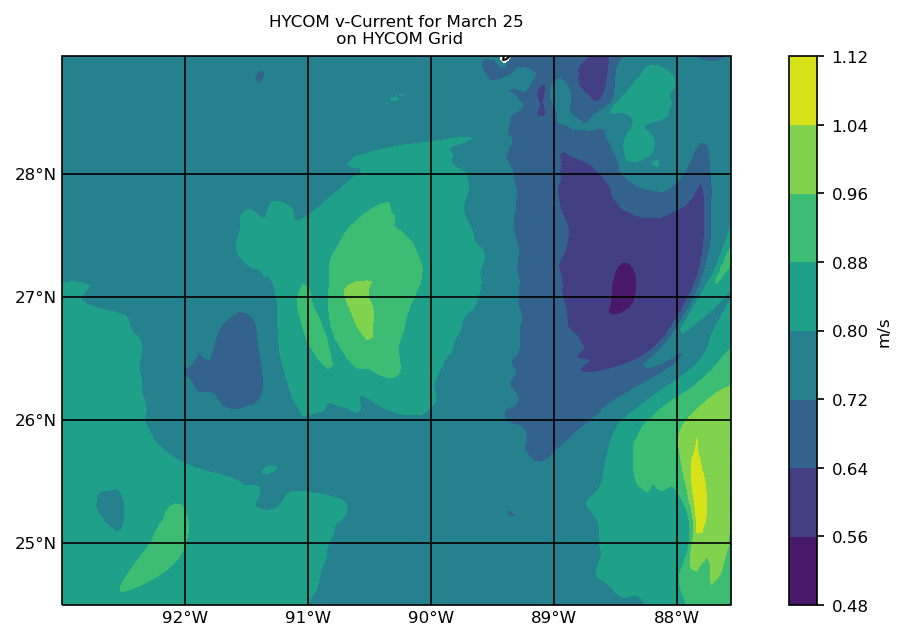

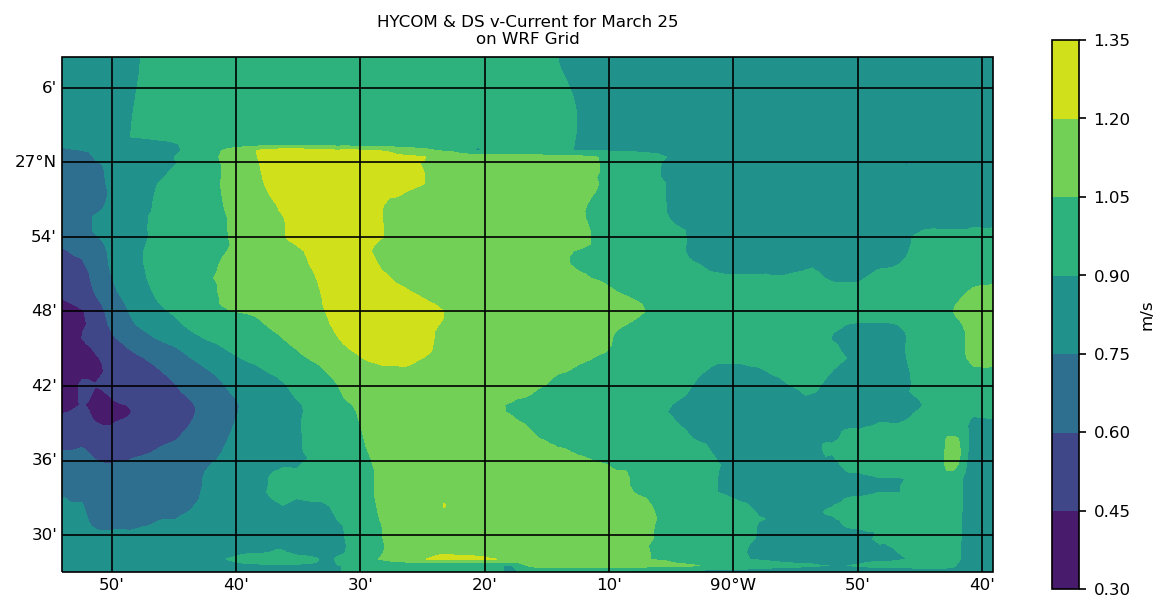

In [15]:
#V25
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(lon_array, lat_array, meanV_25)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM v-Current for March 25\n on HYCOM Grid')
plt.show()
#U25 smooth
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, v25_WRF)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM & DS v-Current for March 25\non WRF Grid')
#save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
#plt.savefig(save_results_to + '25V_Weighted.png', bbox_inches = 'tight',dpi = 150)
plt.show()

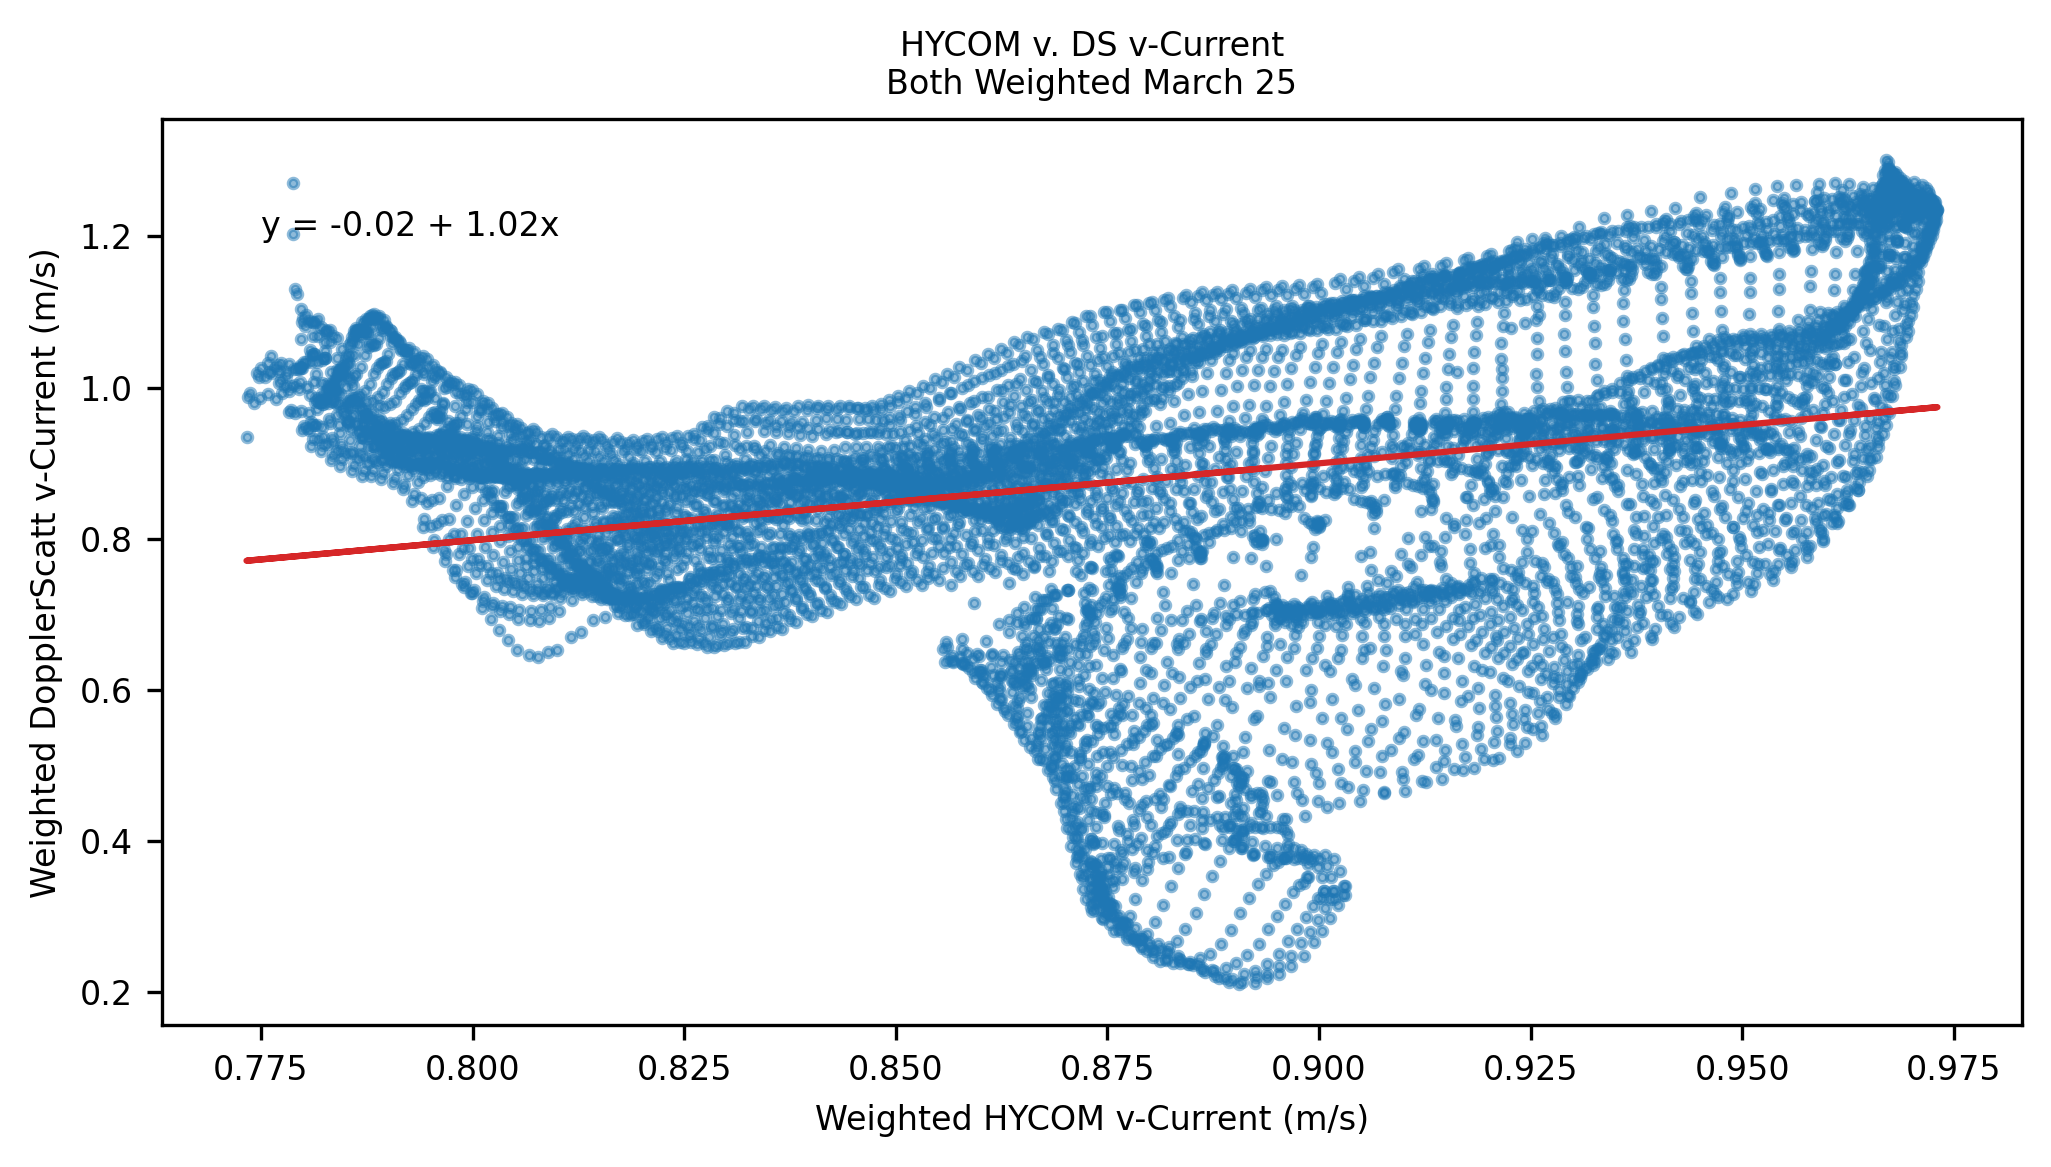

In [16]:
#Scatter for V HYCOM and V DS 

DS25V = DS_weightedV25.flatten() #y, noisier variable on y 
HYCOM25V = HYCOM_weightedV25.flatten() #x 

test_1 = np.where(DS25V!=-999)
test_2 = DS25V[test_1]
test_3 = HYCOM25V[test_1]

DS25V = test_2
HYCOM25V = test_3
a, b = np.polyfit(HYCOM25V, DS25V, 1)
#add line of best fit to plot
#plt.plot(x, a*x+b)
#add fitted regression equation to plot
#plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)


SMALL_SIZE = 8
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
figure(figsize=(8,4), dpi=300)
#alpha between 0 and 1, 0=transparent, 1=solid
plt.scatter(HYCOM25V, DS25V, color='tab:blue', alpha=0.50, s=5)

plt.plot(HYCOM25V, a*HYCOM25V+b, color = 'tab:red')
plt.text(0.775, 1.2, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=8)

plt.title('HYCOM v. DS v-Current\nBoth Weighted March 25')
plt.ylabel('Weighted DopplerScatt v-Current (m/s)')
plt.xlabel('Weighted HYCOM v-Current (m/s)')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + '25V_Scatter.png', bbox_inches = 'tight',dpi = 150)
plt.show()


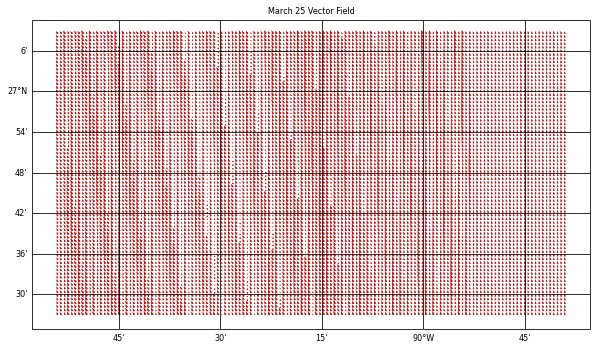

speed25 shape:  (78, 140)


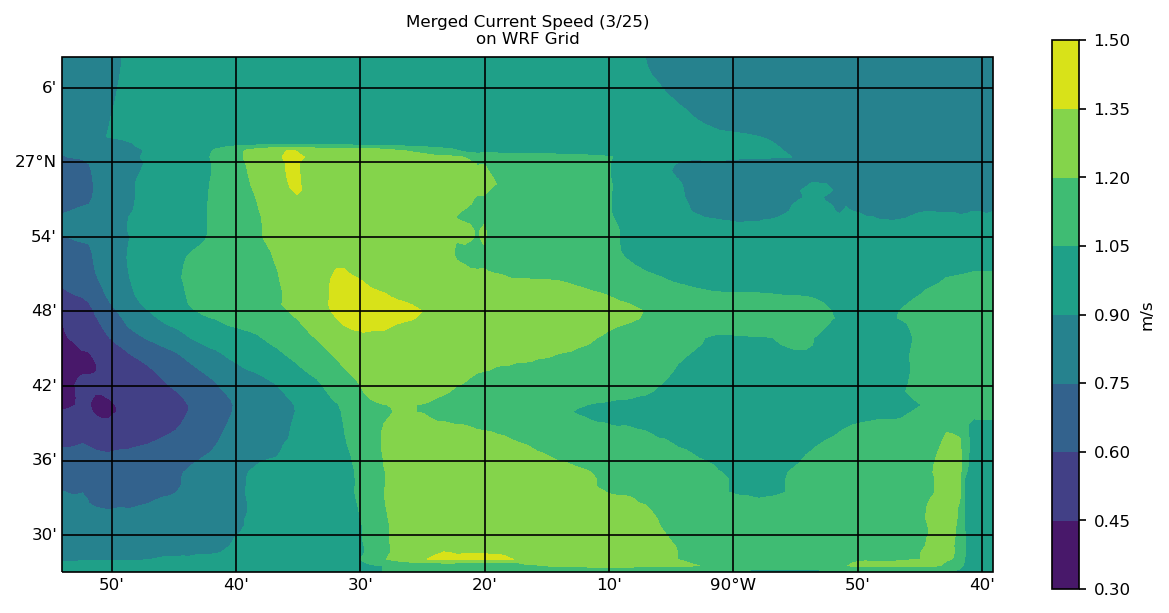

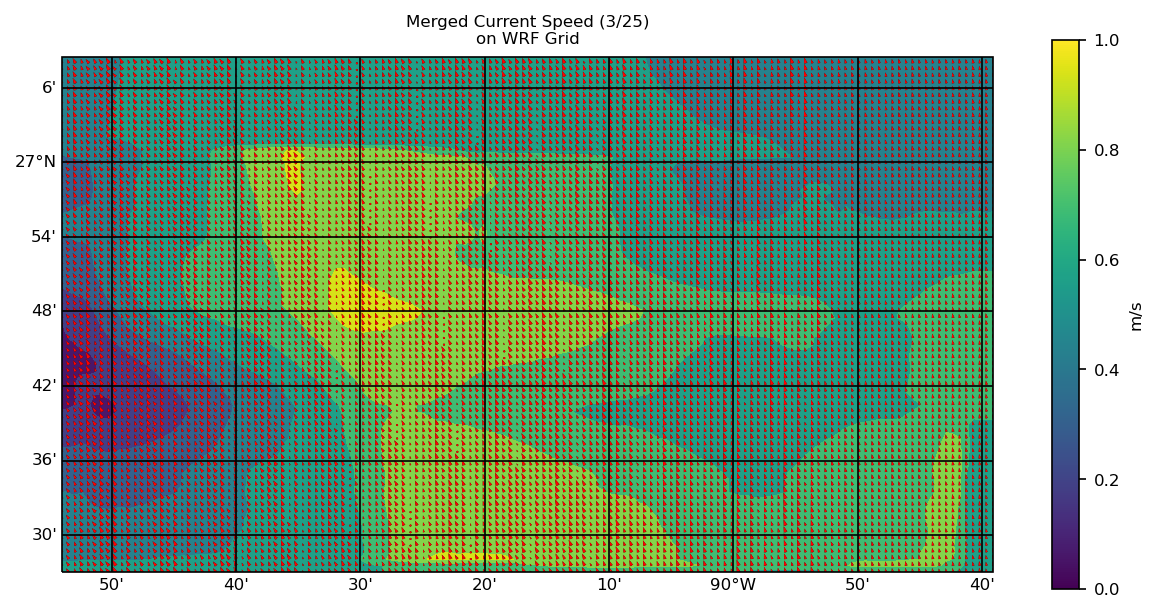

In [18]:
#vector plot 
#s = xarray.open_dataset("1988.nc")
#u=ds.variables['u10'][:]
#v=ds.variables['v10'][:]
#lon=ds.variables['longitude'][:]
#lat=ds.variables['latitude'][:]
#lon2D, lat2D = np.meshgrid(lon, lat)
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#ax.quiver(lon2D, lat2D, u[0,:,:], v[0,:,:]) * insteadt of "0" put any time necessary


#v25 & u25 shape (78, 140)
#lon shape (140,)
#lat shape (78,)

X = WRF_lat
Y = WRF_lon
U =  u25_WRF
V =  v25_WRF

lon2D, lat2D = np.meshgrid(X, Y)

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
#cs = ax.quiver(Lon, Lat, stressI, stressJ)
#ax.quiver(Lon, Lat, stressI, stressJ, color = 'blue', linewidths = 1, transform=ccrs.PlateCarree())
cs = ax.quiver(lat2D, lon2D, U, V)
ax.quiver(lat2D, lon2D, U, V, color = 'red', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'N/m^2')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#don't want labels
gl.top_labels = False
gl.ylabels_right = False
plt.title('March 25 Vector Field')
#plt.savefig('PV_110.png', bbox_inches='tight', dpi=150)
plt.show()


speed25 = np.sqrt((u25_WRF**2)+(v25_WRF**2))
print('speed25 shape: ',speed25.shape)
#U25 smooth
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, speed25)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Merged Current Speed (3/25)\non WRF Grid')
#save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
#plt.savefig(save_results_to + '25V_Weighted.png', bbox_inches = 'tight',dpi = 150)
plt.show()


#COMBINED
#latmin =  26.45
#lonmin = -90.9
#latmax = 27.15
#lonmax = -89.65 

#m = Basemap(projection = 'merc',llcrnrlat=latmin,urcrnrlat=latmax, llcrnrlon=lonmin,urcrnrlon=lonmax,lat_ts=20,resolution='i')

#x = np.arange(lonmin,lonmax,(lonmax-lonmin)/float(U.shape[2]))
#y = np.arange(latmin,latmax,(latmax-latmin)/float(U.shape[1]))
#X,Y = np.meshgrid(x,y)
#lon, lat = m(X,Y)

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, speed25)
#cs = ax.contourf(lat, lon, speed25)
cs = ax.quiver(lat2D, lon2D, U, V)
ax.quiver(lat2D, lon2D, U, V, color = 'red', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Merged Current Speed (3/25)\non WRF Grid')
#save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
#plt.savefig(save_results_to + '25V_Weighted.png', bbox_inches = 'tight',dpi = 150)
plt.show()

In [ ]:
#vorticity/curl plot in m

#v25 & u25 shape (78, 140)
#lon shape (140,)
#lat shape (78,)

#deg2Meter=111100
#new_dx=np.zeros((98,98))
#new_dy=np.zeros((98,98))

for y in range (0, WRF_latLen):  
    for x in range (0, WRF_lonLen):
        dx = (111100 * math.cos(WRF_lat[x] * math.pi / 180)) * (WRF_lon[y+1] - WRF_lon[y-1])
        dy = 111100 * (WRF_lat[x+1] - WRF_lat[x-1])
        du = u25_WRF[x, y+1] - u25_WRF[x, y-1]
        dv = v25_WRF[x+1, y] - v25_WRF[x-1, y]
        curl[y,x] = dv/dx - du/dy

        
    
#get dy & dx
#deg2Meter=111100
#new_dx=np.zeros((98,98))
#new_dy=np.zeros((98,98))
#for y in range(len(Lat)-1):
#    new_dy[:,y]=(Lat[y+1]-Lat[y])*deg2Meter
#for y in range(len(Lat)-1):
#    latAdjust=np.cos(np.pi*Lat[y]/180)
#    for x in range(len(Lon)-1):
#        new_dx[y,x]=(Lon[x+1]-Lon[x])*deg2Meter*latAdjust

#print(new_dx.shape)
#print(new_dy.shape)

#dudy=np.zeros((97,97))
#dvdx=np.zeros((97,97))

#get vorticity/curl 
#for y in range(1,len(Lat)-2):
#    for x in range(1,len(Lon)-2):
        #Winds
        #dudyN=(uWind[y-1,x]-uWind[y,x])/((Lat[y-1]-Lat[y])*deg2Meter)
        #dudyS=(uWind[y,x])-uWind[y+1,x]/((Lat[y]-Lat[y+1])*deg2Meter)
        #dvdxE=(vWind[y,x+1]-vWind[y,x])/((Lon[x+1]-Lon[x])*np.cos(np.pi*Lat[y]/180)*deg2Meter)
        #dvdxW=(vWind[y,x-1]-vWind[y,x])/((Lon[x]-Lon[x-1])*np.cos(np.pi*Lat[y]/180)*deg2Meter)
        
        #Wind Stress
#        dudyN=(stressI[y-1,x]-stressI[y,x])/((Lat[y-1]-Lat[y])*deg2Meter)
#        dudyS=(stressI[y,x])-stressI[y+1,x]/((Lat[y]-Lat[y+1])*deg2Meter)
#        dvdxE=(stressJ[y,x+1]-stressJ[y,x])/((Lon[x+1]-Lon[x])*np.cos(np.pi*Lat[y]/180)*deg2Meter)
#        dvdxW=(stressJ[y,x-1]-stressJ[y,x])/((Lon[x]-Lon[x-1])*np.cos(np.pi*Lat[y]/180)*deg2Meter)
        
        
#        dudy[y,x]=(dudyN+dudyS)/2
#        dvdx[y,x]=(dvdxE+dvdxW)/2

#curlNoC=dvdx-dudy

#print(curl.shape)
#print(curl)

In [18]:
#NETCDF TEST

#OPEN FILE, CREATE NEW DATASET
try: ncfile.close()  # just to be safe, make sure dataset is not already open.
except: pass
ncfile = nc.Dataset('/Users/Anna/Desktop/MSMET/Thesis/newA.nc', mode='w',format='NETCDF4_CLASSIC') 
print(ncfile)

#CREATING DIMENSIONS
#lat_dim = ncfile.createDimension('lat', 73)     # latitude axis
#lon_dim = ncfile.createDimension('lon', 144)    # longitude axis
lat_dim = ncfile.createDimension('lat', 28)     # latitude axis
lon_dim = ncfile.createDimension('lon', 28)    # longitude axis
time_dim = ncfile.createDimension('time', None) # unlimited axis (can be appended to).
for dim in ncfile.dimensions.items():
    print(dim)

#CREATING ATTRIBUTES
#ncfile.title='My model data'
ncfile.title='WRF_out_test'
print(ncfile.title)

#ncfile.subtitle="My model data subtitle"
ncfile.subtitle="u25"
print(ncfile.subtitle)
print(ncfile)

#CREATING VARIABLES
# Define two variables with the same names as dimensions,
# a conventional way to define "coordinate variables".
lat = ncfile.createVariable('lat', np.float32, ('lat',))
lat.units = 'degrees_north'
lat.long_name = 'latitude'
lon = ncfile.createVariable('lon', np.float32, ('lon',))
lon.units = 'degrees_east'
lon.long_name = 'longitude'
time = ncfile.createVariable('time', np.float64, ('time',))
time.units = 'hours since 1800-01-01'
time.long_name = 'time'
# Define a 3D variable to hold the data
#temp = ncfile.createVariable('temp',np.float64,('time','lat','lon')) # note: unlimited dimension is leftmost
#temp.units = 'K' # degrees Kelvin
#temp.standard_name = 'air_temperature' # this is a CF standard name
#print(temp)
u_current = ncfile.createVariable('u_current',np.float64,('time','lat','lon')) # note: unlimited dimension is leftmost
u_current.units = 'm/s' # degrees Kelvin
u_current.standard_name = 'east-west current component' # this is a CF standard name
print(u_current)
u_current[:,:] =  u25_WRF
print('\nu_currents:', u25_WRF[:,:])
#PREDEFINED VARIABLES
#print("-- Some pre-defined attributes for variable temp:")
#print("temp.dimensions:", temp.dimensions)
#print("temp.shape:", temp.shape)
#print("temp.dtype:", temp.dtype)
#print("temp.ndim:", temp.ndim)
print("\n-- Some pre-defined attributes for variable u_current:")
print("u_current.dimensions:", u_current.dimensions)
print("u_current.shape:", u_current.shape)
print("u_current.dtype:", u_current.dtype)
print("u_current.ndim:", u_current.ndim)

#WRITING DATA
#nlats = len(lat_dim); nlons = len(lon_dim); ntimes = 3
# Write latitudes, longitudes.
# Note: the ":" is necessary in these "write" statements
#lat[:] = -90. + (180./nlats)*np.arange(nlats) # south pole to north pole
#lon[:] = (180./nlats)*np.arange(nlons) # Greenwich meridian eastward
# create a 3D array of random numbers
#data_arr = np.random.uniform(low=280,high=330,size=(ntimes,nlats,nlons))
# Write the data.  This writes the whole 3D netCDF variable all at once.
#temp[:,:,:] = data_arr  # Appends data along unlimited dimension
#print("-- Wrote data, temp.shape is now ", temp.shape)
# read data back from variable (by slicing it), print min and max
#print("-- Min/Max values:", temp[:,:,:].min(), temp[:,:,:].max())

#nlats = len(lat_dim); nlons = len(lon_dim); ntimes = 3
# Write latitudes, longitudes.
# Note: the ":" is necessary in these "write" statements
#lat[:] = -90. + (180./nlats)*np.arange(nlats) # south pole to north pole
#lon[:] = (180./nlats)*np.arange(nlons) # Greenwich meridian eastward
lat[:] = WRF_lat 
lon[:]= WRF_lon
print('\nlats:', lat[:])
print('lons;', lon[:])
# create a 3D array of random numbers
#data_arr = np.random.uniform(low=280,high=330,size=(ntimes,nlats,nlons))
# Write the data.  This writes the whole 3D netCDF variable all at once.
#u_current[:,:,:] = data_arr  # Appends data along unlimited dimension
#print("-- Wrote data, u_current.shape is now ", u_current.shape)
# read data back from variable (by slicing it), print min and max
#print("-- Min/Max values:", u_current[:,:,:].min(), u_current[:,:,:].max())
'''
# create a 2D array of random numbers
#data_slice = np.random.uniform(low=280,high=330,size=(nlats,nlons))
#temp[3,:,:] = data_slice   # Appends the 4th time slice
print("-- Wrote more data, u_current.shape is now ", u_current.shape)
# create a 2D array of random numbers
data_slice = np.random.uniform(low=280,high=330,size=(nlats,nlons))
u_current[3,:,:] = data_slice   # Appends the 4th time slice
print("-- Wrote more data, u_current.shape is now ", u_current.shape)
'''
print('\ntime:', time[:])
times_arr = time[:]
print(type(times_arr),times_arr)  # dashes indicate masked values (where data has not yet been written)

# 1st 4 days of October.
#dates = [dt.datetime(2014,10,1,0),dt.datetime(2014,10,2,0),dt.datetime(2014,10,3,0),dt.datetime(2014,10,4,0)]
#print(dates)
dates = [dt.datetime(2018,3,25,0)]
print('\ndate:', dates[0])
times = date2num(dates, time.units)
print(times, time.units) # numeric values
time[:] = times
# read time data back, convert to datetime instances, check values.
print(time[:])
print(time.units)
print(num2date(time[:],time.units))

#CLOSING NETCDF
# first print the Dataset object to see what we've got
print(ncfile)
# close the Dataset.
ncfile.close(); print('\nDataset is closed!')


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 28)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 28)
('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 0)
WRF_out_test
u25
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: WRF_out_test
    subtitle: u25
    dimensions(sizes): lat(28), lon(28), time(0)
    variables(dimensions): 
    groups: 
<class 'netCDF4._netCDF4.Variable'>
float64 u_current(time, lat, lon)
    units: m/s
    standard_name: east-west current component
unlimited dimensions: time
current shape = (0, 28, 28)
filling on, default _FillValue of 9.969209968386869e+36 used

u_currents: [[-0.55885205 -0.55221555 -0.54568251 -0.5412403  -0.53690489 -0.53325067
  -0.53124194 -0.52810309 -0.52125363